#**TEAM PEÑAROL**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [ ]:
df = pd.read_csv('EstudioCrediticio_TrainP.csv')
df.head()

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44,22119,613.0,Empleado/a por cuenta ajena,FP,20.0,16154,60,Divorciado/a,...,1843.250000,0.771340,2,28390,0.179654,0.171628,402.883608,0.483322,0,50.0
1,2,26,28874,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800,24,Divorciado/a,...,2406.166667,NaN,6,115113,0.160800,0.172783,584.997790,0.541524,0,54.0
2,3,38,84154,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257,36,Divorciado/a,...,7012.833333,0.881874,4,41268,0.205757,0.217175,352.177802,0.074460,1,42.4
3,4,51,29464,504.0,Autónomo/a,FP,25.0,5495,36,Divorciado/a,...,2455.333333,0.797217,5,1927,0.203495,0.197683,203.565671,0.246633,1,45.6
4,5,39,20646,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824,60,Soltero/a,...,1720.500000,0.714030,3,10011,0.213824,0.212976,403.524570,0.375196,0,61.0


# Quick Look at the data structure

We will begin by getting to know the data we are working with, their types, the total amount, and whether they contain null values, before performing preprocessing.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             50000 non-null  int64  
 1   Edad                           50000 non-null  int64  
 2   IngresoBrutoAnual              50000 non-null  int64  
 3   ScoreCrediticio                47500 non-null  float64
 4   SituacionLaboral               50000 non-null  object 
 5   NivelEducativo                 45000 non-null  object 
 6   Experiencia                    37000 non-null  float64
 7   CuantiaCredito                 50000 non-null  int64  
 8   DuracionCredito                50000 non-null  int64  
 9   EstadoCivil                    39000 non-null  object 
 10  NumeroPersonasDependientes     44000 non-null  float64
 11  EstadoVivienda                 50000 non-null  object 
 12  PagoMensualDeuda               50000 non-null 

In [ ]:
df.set_index('Id', inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Experiencia                      13000
EstadoCivil                      11000
HistoricoPagosSuministros         8500
NumeroPersonasDependientes        6000
NivelEducativo                    5000
ScoreCrediticio                   2500
Edad                                 0
EstabilidadLaboral                   0
BalanceCuentaCorriente               0
TotalActivos                         0
TotalPasivos                         0
IngresoBrutoMensual                  0
TipoInteres                          0
PatrimonioNeto                       0
TipoInteresBase                      0
DuracionHistoricoCredito             0
PagoMensualCredito                   0
RatioTotalDeudaIngresos              0
CreditoAprobado                      0
BalanceCuentaAhorros                 0
ObjetoCredito                        0
HistoricoPagos                       0
HistoricoImpagos                     0
IngresoBrutoAnual                    0
HistoricoInsolvencia                 0
RatioDeudaIngresos       

We found that serveral columns have null data, there are two options here. Either delete the columns or enter random values using some kind of criteria to process them

In [ ]:
df.describe()

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
count,50000.000000,50000.000000,47500.000000,37000.000000,50000.000000,50000.000000,44000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,41500.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,39.757580,36386.727360,570.975347,17.447459,15219.269420,53.716560,1.539386,457.805840,0.285653,3.009180,...,3009.648663,0.799806,4.99354,7.472013e+04,0.194503,0.194582,519.574152,0.439196,0.293240,50.742756
std,11.606172,24526.447116,51.732132,11.280861,8102.208893,24.630848,1.393505,245.646956,0.159963,1.735833,...,2014.586218,0.120928,2.22108,1.295051e+05,0.034073,0.039081,385.750819,0.311938,0.455252,7.918796
min,18.000000,15000.000000,358.000000,0.000000,1517.000000,12.000000,0.000000,50.000000,0.001204,0.000000,...,1250.000000,0.217950,0.00000,1.000000e+03,0.088792,0.083259,44.093087,0.017110,0.000000,26.400000
25%,32.000000,19276.500000,539.000000,9.000000,9616.000000,36.000000,0.000000,287.000000,0.161648,2.000000,...,1596.958333,0.726844,3.00000,8.580000e+03,0.170016,0.166589,280.615934,0.219170,0.000000,44.800000
50%,40.000000,29379.000000,578.000000,17.000000,13427.000000,48.000000,1.000000,402.000000,0.262764,3.000000,...,2435.416667,0.820477,5.00000,3.280800e+04,0.191688,0.190946,414.927762,0.360822,0.000000,52.000000
75%,48.000000,44947.750000,609.000000,25.000000,18805.250000,60.000000,3.000000,566.000000,0.389237,4.000000,...,3720.750000,0.892515,6.00000,9.012050e+04,0.216305,0.218748,626.940786,0.571029,1.000000,56.000000
max,80.000000,300000.000000,714.000000,62.000000,116887.000000,120.000000,5.000000,3332.000000,0.946886,15.000000,...,25000.000000,0.999603,16.00000,6.526980e+06,0.352866,0.378914,6343.673199,4.961286,1.000000,81.000000


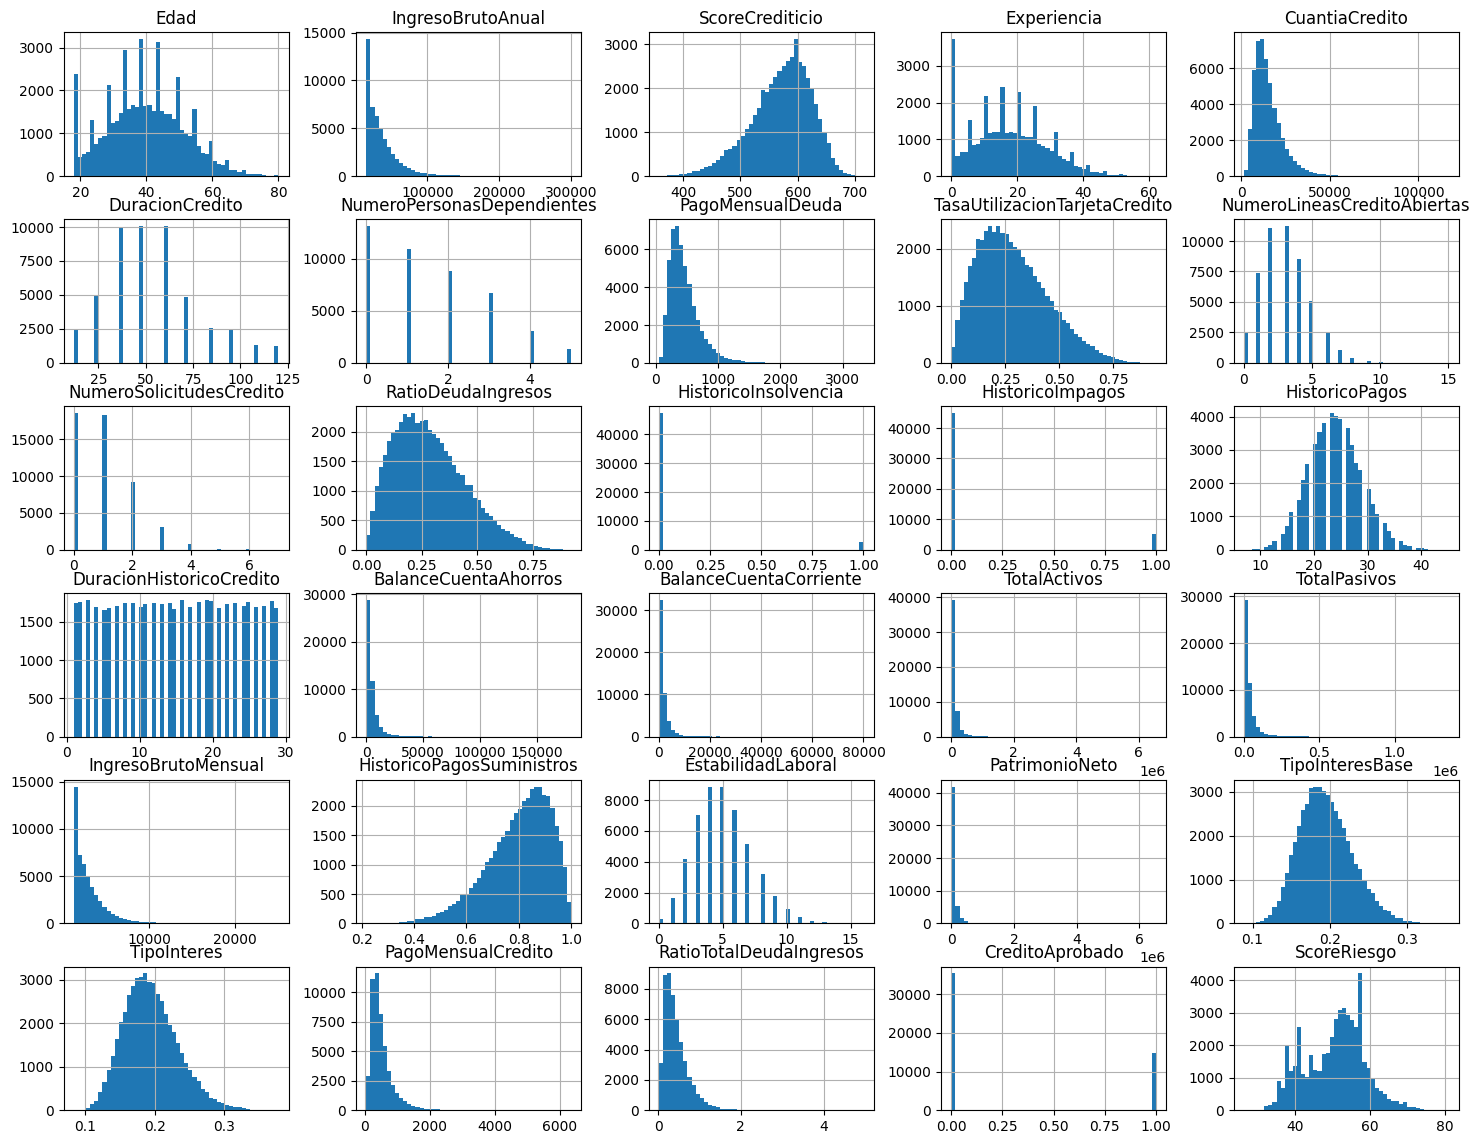

In [ ]:
df.hist(bins=50, figsize=(18, 14))
plt.show()

In [ ]:
df['CreditoAprobado'].value_counts()

CreditoAprobado
0    35338
1    14662
Name: count, dtype: int64

In [ ]:
# porcentage of 0 against 1's
df['CreditoAprobado'].value_counts(normalize=True)

CreditoAprobado
0    0.70676
1    0.29324
Name: proportion, dtype: float64

It can be observed that the data in the target column 'CreditoAprobado' are quite imbalanced, with a 70%/30% ratio of negative values over positive ones. This is an important factor to consider when splitting the train-test sets, as we will use stratification techniques.

<Axes: >

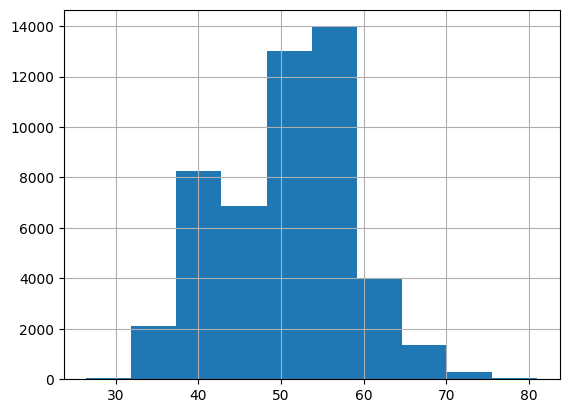

In [ ]:
df['ScoreRiesgo'].hist()

In [ ]:
df['ScoreRiesgo'].describe()

count    50000.000000
mean        50.742756
std          7.918796
min         26.400000
25%         44.800000
50%         52.000000
75%         56.000000
max         81.000000
Name: ScoreRiesgo, dtype: float64

A lot of information can be drawn from this table. First, we observe that the mean of the variable (50.742756) and the median (52.000000) are quite close, which may suggest that this is a relatively symmetric variable.

If we look at the interquartile range, we see that most of the data falls between 44.8 and 56, meaning that approximately 50% of the values are within this range, which represents moderate variation.

The standard deviation is relatively low (7.92) considering that we are working within a range that spans from 26.4 to 81.

Since the mean and median are close, and the interquartile range suggests that most of the data is clustered between 44.8 and 56, the 'ScoreRiesgo' variable does not appear to be significantly imbalanced at first glance. Next, we will calculate the skewness and kurtosis coefficients for more information.

In [ ]:
from scipy.stats import skew, kurtosis

skewness = skew(df['ScoreRiesgo'])
kurt = kurtosis(df['ScoreRiesgo'])

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurt}')

Skewness: -0.07195416978217219
Kurtosis: -0.3707614551769476


We can observe that the skewness value is -0.07, which is quite close to zero. When this value is near zero, it indicates that the variable is fairly symmetrical, which aligns with the closeness between the mean and the median. The coefficient is slightly negative, suggesting a slight left skew, but it is not significant enough to be a major issue at this point.

The negative kurtosis indicates that the distribution has shorter tails and is flatter in the center, meaning there are fewer extreme values than one would expect in a normal distribution.

Finally, we will print a boxplot of the variable to gain information about the outliers.

<Axes: >

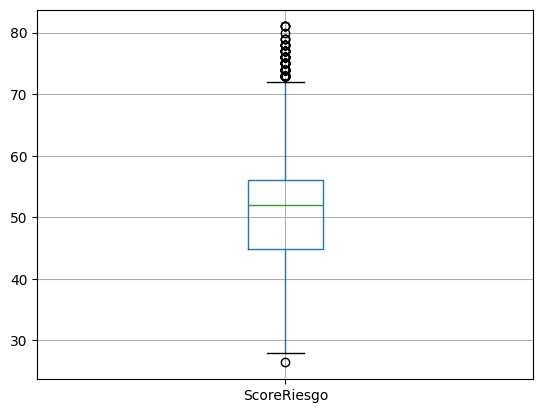

In [ ]:
df.boxplot(column=['ScoreRiesgo'])

According to the boxplot, most of the data is between the values of 40 and 60, with some outliers in the upper range (above 70) and a few in the lower range (below 30), but these are much less significant.

'ScoreRiesgo' presents a mostly symmetrical distribution, with few outliers in the upper extremes, suggesting that there is no significant imbalance in the data that would justify special treatment during the train/test split.

# Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

classification_train_data, classification_test_data = train_test_split(
  df, test_size=0.2, stratify=df["CreditoAprobado"], random_state=42)

regression_train_data, regression_test_data = train_test_split(
  df, test_size=0.2, random_state=42)

classification_train_data.head(10)

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
Id,,,,,,,,,,,,,,,,,,,,,
12215,23,23921,563.0,Desempleado/a,FP,NaN,14396,36,Casado/a,3.0,...,1993.416667,0.545781,4,1612,0.182896,0.186845,525.406384,0.338818,0,55.0
9822,49,33439,559.0,Empleado/a por cuenta ajena,FP,23.0,14764,48,Viudo/a,1.0,...,2786.583333,0.732378,3,6999,0.195264,0.189080,440.729011,0.231010,0,54.0
5971,54,235144,613.0,Empleado/a por cuenta ajena,Máster,33.0,8893,36,Soltero/a,NaN,...,19595.333333,0.793272,4,66760,0.152393,0.164448,314.607970,0.036672,1,34.4
35334,56,15000,604.0,Empleado/a por cuenta ajena,Grado universitario,35.0,8335,60,Divorciado/a,1.0,...,1250.000000,0.941988,8,52099,0.176335,0.180248,211.766767,0.367813,0,54.0
36697,18,34533,600.0,Empleado/a por cuenta ajena,Bachillerato,0.0,20206,36,Divorciado/a,2.0,...,2877.750000,0.882072,5,1747,0.170206,0.155347,705.750297,0.334202,0,57.0
46625,50,31105,627.0,Empleado/a por cuenta ajena,Máster,NaN,18712,60,Soltero/a,4.0,...,2592.083333,0.879735,9,30687,0.175212,0.177331,472.449002,0.299161,0,59.0
42770,23,16144,609.0,Autónomo/a,NaN,NaN,26823,36,Casado/a,5.0,...,1345.333333,0.872956,8,3005,0.172323,0.168315,954.065377,1.088998,0,51.0
30027,50,32579,600.0,Empleado/a por cuenta ajena,Máster,NaN,11147,84,NaN,NaN,...,2714.916667,NaN,7,27122,0.201147,0.184061,236.946795,0.224297,1,39.2
8103,36,21129,644.0,Autónomo/a,Máster,NaN,12127,48,Casado/a,NaN,...,1760.750000,0.947520,2,7928,0.150127,0.148502,336.583585,0.618250,0,51.0


Based on the reasearch and the results that we've got by looking at the data we decided that to train and test the classification algorithm we will split using a stratify of 'CreditoAprobado' because we identified imbalanced data. As for the regression algorithm we believe are balanced so we are not using any specific strategy.

# Explore and Visualize the Data to Gain Insights

In [ ]:
credit_data = df.copy()


We decided to start looking at the field 'IngresoBrutoMensual' to see the correlation between granting or not granting the credit for both columns.

<Axes: xlabel='IngresoBrutoMensual', ylabel='ScoreRiesgo'>

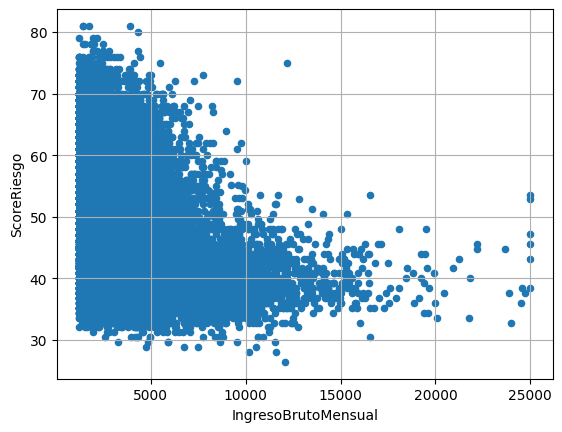

In [ ]:
credit_data.plot(kind="scatter", x="IngresoBrutoMensual", y="ScoreRiesgo", grid=True)

<Axes: xlabel='IngresoBrutoMensual', ylabel='ScoreRiesgo'>

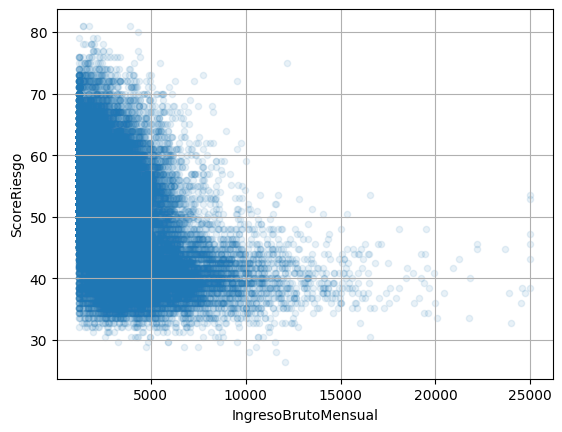

In [ ]:
# plot 'ScoreCrediticio' with 'ScoreRiesgo'
credit_data.plot(kind="scatter", x="IngresoBrutoMensual", y="ScoreRiesgo", grid=True, alpha=0.1)

<Axes: xlabel='CreditoAprobado', ylabel='IngresoBrutoMensual'>

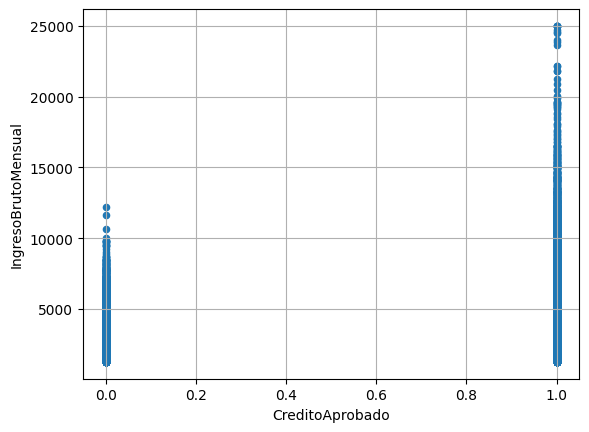

In [ ]:
credit_data.plot(kind="scatter", x="CreditoAprobado", y="IngresoBrutoMensual", grid=True)

We can say that even though if the 'IngresoBrutoMensual' is lower than 10k it does not necessarily mean that the credit won't be granted.
On the other hand if it is higher it will most likely be granted.

In [ ]:
numeric_columns = credit_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio', 'Experiencia',
       'CuantiaCredito', 'DuracionCredito', 'NumeroPersonasDependientes',
       'PagoMensualDeuda', 'TasaUtilizacionTarjetaCredito',
       'NumeroLineasCreditoAbiertas', 'NumeroSolicitudesCredito',
       'RatioDeudaIngresos', 'HistoricoInsolvencia', 'HistoricoImpagos',
       'HistoricoPagos', 'DuracionHistoricoCredito', 'BalanceCuentaAhorros',
       'BalanceCuentaCorriente', 'TotalActivos', 'TotalPasivos',
       'IngresoBrutoMensual', 'HistoricoPagosSuministros',
       'EstabilidadLaboral', 'PatrimonioNeto', 'TipoInteresBase',
       'TipoInteres', 'PagoMensualCredito', 'RatioTotalDeudaIngresos',
       'CreditoAprobado', 'ScoreRiesgo'],
      dtype='object')

In [ ]:
# all numerical attributes
# [ 'Edad', 'IngresoBrutoAnual', 'ScoreCrediticio',
#        'Experiencia', 'CuantiaCredito', 'DuracionCredito', 'NumeroPersonasDependientes',
#        'PagoMensualDeuda', 'TasaUtilizacionTarjetaCredito',
#        'NumeroLineasCreditoAbiertas', 'NumeroSolicitudesCredito',
#        'RatioDeudaIngresos', 'HistoricoInsolvencia',
#        'HistoricoImpagos', 'HistoricoPagos', 'DuracionHistoricoCredito',
#        'BalanceCuentaAhorros', 'BalanceCuentaCorriente', 'TotalActivos',
#        'TotalPasivos', 'IngresoBrutoMensual', 'HistoricoPagosSuministros',
#        'EstabilidadLaboral', 'PatrimonioNeto', 'TipoInteresBase',
#        'TipoInteres', 'PagoMensualCredito', 'RatioTotalDeudaIngresos',
#        'CreditoAprobado', 'ScoreRiesgo']
attributes = numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# create dataset with "attributes"
numeric_attrs_credit_data = credit_data[attributes]

corr_matrix = numeric_attrs_credit_data.corr()

In [ ]:
corr_matrix["ScoreRiesgo"].sort_values(ascending=False)

ScoreRiesgo                      1.000000
RatioTotalDeudaIngresos          0.375513
HistoricoInsolvencia             0.371099
RatioDeudaIngresos               0.297219
TipoInteres                      0.272614
HistoricoImpagos                 0.267150
TipoInteresBase                  0.252918
CuantiaCredito                   0.142379
PagoMensualCredito               0.117801
TasaUtilizacionTarjetaCredito    0.094299
PagoMensualDeuda                 0.079818
DuracionCredito                  0.058761
TotalPasivos                     0.057712
NumeroPersonasDependientes       0.004877
BalanceCuentaCorriente           0.003382
BalanceCuentaAhorros             0.002366
NumeroLineasCreditoAbiertas      0.001363
EstabilidadLaboral              -0.000233
NumeroSolicitudesCredito        -0.006598
HistoricoPagosSuministros       -0.010031
HistoricoPagos                  -0.028085
Edad                            -0.165514
Experiencia                     -0.166209
DuracionHistoricoCredito        -0

We wanted to see the correlation between all the columns of the dataset against the 'ScoreRiesgo'. The returned values will be between -1 and 1.

*   If it is 1 then it is a perfect positive relationship (if one increases the other increases).
*   If it is 0 then there is no correlation between them.
*   If it is -1 then it is a perfect negative relationship (if one increases the other decreases).

If we look at the data it makes sense then that 'ScoreRiesgo' and 'CreditoAprobado' are almost perfect negative relationships.

With this table we can see the features that imapact the most in a positive and negative way against 'ScoreCredito'

In [ ]:
corr_matrix["CreditoAprobado"].sort_values(ascending=False)

CreditoAprobado                  1.000000
IngresoBrutoMensual              0.564305
IngresoBrutoAnual                0.560267
PatrimonioNeto                   0.198757
TotalActivos                     0.194685
ScoreCrediticio                  0.154064
Experiencia                      0.144866
Edad                             0.144663
DuracionHistoricoCredito         0.137355
HistoricoPagos                   0.038764
RatioDeudaIngresos               0.010706
HistoricoPagosSuministros        0.005272
NumeroSolicitudesCredito         0.005155
EstabilidadLaboral               0.000252
TasaUtilizacionTarjetaCredito   -0.001669
NumeroLineasCreditoAbiertas     -0.001939
NumeroPersonasDependientes      -0.002186
BalanceCuentaAhorros            -0.003138
BalanceCuentaCorriente          -0.005610
TotalPasivos                    -0.033328
HistoricoImpagos                -0.077661
HistoricoInsolvencia            -0.079348
DuracionCredito                 -0.102431
PagoMensualDeuda                -0

Here we did the same but with 'CreditoAprobado'. The biggest difference is that the positives here are the ones that grant the credit while in the 'ScoreRiesgo' is the opposite

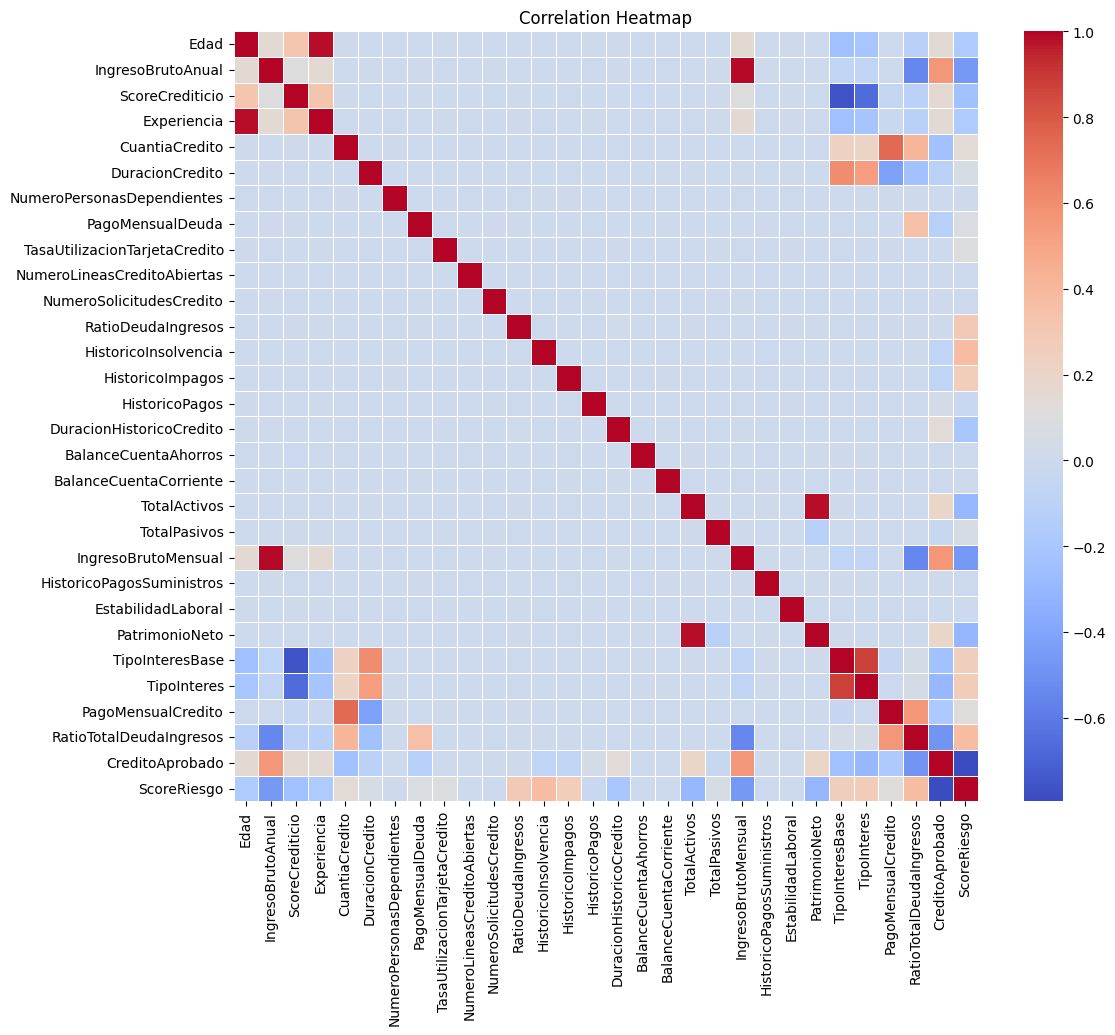

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can see that there are a few attributes that are highly correlated between them, so having both of them would not be necessary.
Later, in feature selection, we'll have this in mind.

## Experiment with Attribute Combinations

In this section, we'll try to add some new attribute combinations into the dataset, so we may uncover hidden patterns and improve our model's performance in predicting. We'll check if the correlation between the created attributes and the target ones is high in order to add them.

In [ ]:
# Ensure there are no division by zero errors by replacing zeros with a small number (if necessary)
credit_data['TotalDebtPayment'] = credit_data['PagoMensualDeuda'] + credit_data['PagoMensualCredito']

# Replace zeros in TotalDebtPayment to avoid division by zero
credit_data['TotalDebtPayment'] = credit_data['TotalDebtPayment'].replace(0, 0.0001)

# Calculate DSCR Debt Service Coverage Ratio
credit_data['DSCR'] = credit_data['IngresoBrutoMensual'] / credit_data['TotalDebtPayment']


# Calculate Monthly Disposable Income
credit_data['MonthlyDisposableIncome'] = credit_data['IngresoBrutoMensual'] - credit_data['TotalDebtPayment']

In [ ]:
# all numerical attributes
attributes = ['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio',
       'Experiencia', 'CuantiaCredito', 'DuracionCredito', 'NumeroPersonasDependientes',
       'PagoMensualDeuda', 'TasaUtilizacionTarjetaCredito',
       'NumeroLineasCreditoAbiertas', 'NumeroSolicitudesCredito',
       'RatioDeudaIngresos', 'HistoricoInsolvencia',
       'HistoricoImpagos', 'HistoricoPagos', 'DuracionHistoricoCredito',
       'BalanceCuentaAhorros', 'BalanceCuentaCorriente', 'TotalActivos',
       'TotalPasivos', 'IngresoBrutoMensual', 'HistoricoPagosSuministros',
       'EstabilidadLaboral', 'PatrimonioNeto', 'TipoInteresBase',
       'TipoInteres', 'PagoMensualCredito', 'RatioTotalDeudaIngresos', 'DSCR',
       'MonthlyDisposableIncome', 'TotalDebtPayment',
       'CreditoAprobado', 'ScoreRiesgo']

# create dataset with "attributes"
numeric_attrs_credit_data = credit_data[attributes]

corr_matrix = numeric_attrs_credit_data.corr()

In [ ]:
corr_matrix["ScoreRiesgo"].sort_values(ascending=False)

ScoreRiesgo                      1.000000
RatioTotalDeudaIngresos          0.375513
HistoricoInsolvencia             0.371099
RatioDeudaIngresos               0.297219
TipoInteres                      0.272614
HistoricoImpagos                 0.267150
TipoInteresBase                  0.252918
CuantiaCredito                   0.142379
TotalDebtPayment                 0.142105
PagoMensualCredito               0.117801
TasaUtilizacionTarjetaCredito    0.094299
PagoMensualDeuda                 0.079818
DuracionCredito                  0.058761
TotalPasivos                     0.057712
NumeroPersonasDependientes       0.004877
BalanceCuentaCorriente           0.003382
BalanceCuentaAhorros             0.002366
NumeroLineasCreditoAbiertas      0.001363
EstabilidadLaboral              -0.000233
NumeroSolicitudesCredito        -0.006598
HistoricoPagosSuministros       -0.010031
HistoricoPagos                  -0.028085
Edad                            -0.165514
Experiencia                     -0

In [ ]:
corr_matrix["CreditoAprobado"].sort_values(ascending=False)

CreditoAprobado                  1.000000
MonthlyDisposableIncome          0.598807
DSCR                             0.575918
IngresoBrutoMensual              0.564305
IngresoBrutoAnual                0.560267
PatrimonioNeto                   0.198757
TotalActivos                     0.194685
ScoreCrediticio                  0.154064
Experiencia                      0.144866
Edad                             0.144663
DuracionHistoricoCredito         0.137355
HistoricoPagos                   0.038764
RatioDeudaIngresos               0.010706
HistoricoPagosSuministros        0.005272
NumeroSolicitudesCredito         0.005155
EstabilidadLaboral               0.000252
TasaUtilizacionTarjetaCredito   -0.001669
NumeroLineasCreditoAbiertas     -0.001939
NumeroPersonasDependientes      -0.002186
BalanceCuentaAhorros            -0.003138
BalanceCuentaCorriente          -0.005610
TotalPasivos                    -0.033328
HistoricoImpagos                -0.077661
HistoricoInsolvencia            -0

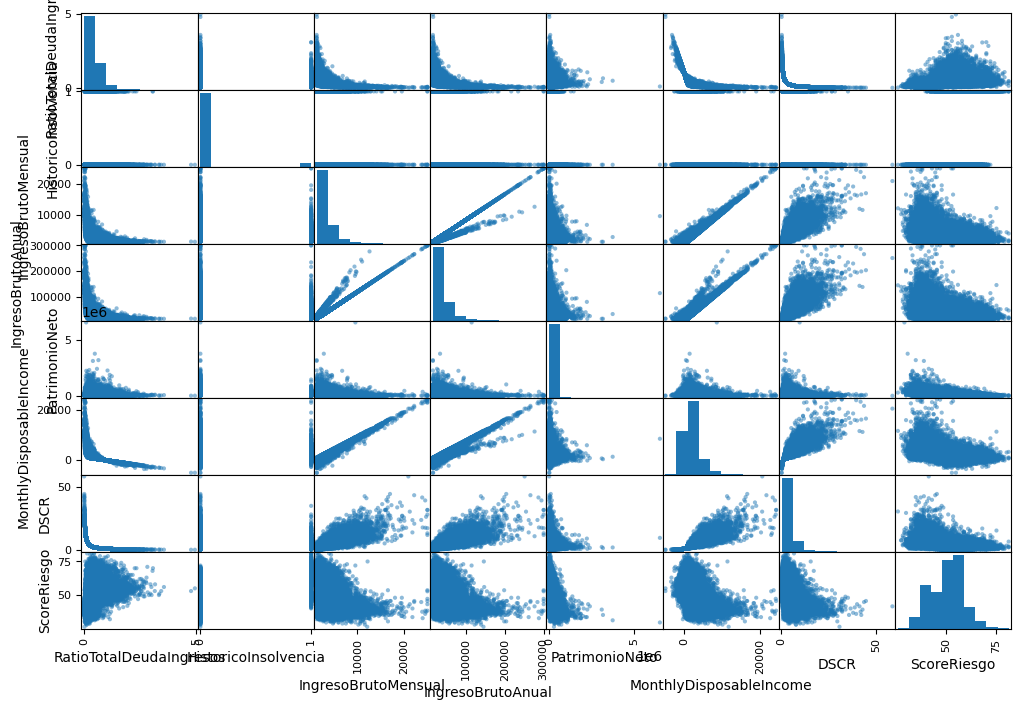

In [ ]:
from pandas.plotting import scatter_matrix

corr_attributes = ["RatioTotalDeudaIngresos", "HistoricoInsolvencia", "IngresoBrutoMensual", "IngresoBrutoAnual", "PatrimonioNeto", "MonthlyDisposableIncome", "DSCR","ScoreRiesgo"]

scatter_matrix(credit_data[corr_attributes], figsize=(12, 8))
plt.show()

Despite observing that the newly created attributes—Debt Service Coverage Ratio (DSCR) and Monthly Disposable Income—are highly correlated with the target variables, they predominantly stem from IngresoBrutoMensual, which already has a strong correlation with the targets.

Analyzing the correlations, we find that these new attributes are nearly perfectly correlated with IngresoBrutoMensual. This is expected since one is a linear combination of it, and the other involves it directly in a division.

So, we will not include these attributes in the final model, as they do not offer significant additional predictive value beyond what IngresoBrutoMensual already provides.

# Prepare the data for ML models
In order to train a model we are going to have to decide what do we do with the null values and how are we going to modify the text and the categorical attributes so that it can be parsed to numbers for the model to be more accurate or in the case of regression possible.

Considering the amount of data available that we have (50k of rows) to train and test we decided that we couldn't afford to either delete the rows or the columns so that is why we are going to use differnt strategies to populate missing data by adding it with different strategies.

In [ ]:
classification_credit_data = classification_train_data.drop(["ScoreRiesgo", "CreditoAprobado"], axis=1)
classification_credit_data_labels = classification_train_data[["ScoreRiesgo", "CreditoAprobado"]].copy()
regression_credit_data = regression_train_data.drop(["ScoreRiesgo", "CreditoAprobado"], axis=1)
regression_credit_data_labels = regression_train_data[["ScoreRiesgo", "CreditoAprobado"]].copy()

## Impute null values


Impute null values from attributes:
*   Experiencia
*   EstadoCivil
*   HistoricoPagosSuministros
*   NumeroPersonasDependientes
*   NivelEducativo
*   ScoreCrediticio

Note that "EstadoCivil" and "NivelEducativo" are categorical attributes, so let's be aware of that.

### Numerical Attributes

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
classification_credit_data_num = classification_credit_data.select_dtypes(include=[np.number])
regression_credit_data_num = regression_credit_data.select_dtypes(include=[np.number])

In [ ]:
numerical_imputer = SimpleImputer(strategy="median")
numerical_imputer.fit(classification_credit_data_num)
X = numerical_imputer.transform(classification_credit_data_num)

In [ ]:
classification_numeric_transformed = pd.DataFrame(X, columns=classification_credit_data_num.columns,
                          index=classification_credit_data_num.index)

In [ ]:
numerical_imputer = SimpleImputer(strategy="median")
numerical_imputer.fit(regression_credit_data_num)
X = numerical_imputer.transform(regression_credit_data_num)

In [ ]:
regression_numeric_transformed = pd.DataFrame(X, columns=regression_credit_data_num.columns,
                          index=regression_credit_data_num.index)

In [ ]:
classification_numeric_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 12215 to 49538
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           40000 non-null  float64
 1   IngresoBrutoAnual              40000 non-null  float64
 2   ScoreCrediticio                40000 non-null  float64
 3   Experiencia                    40000 non-null  float64
 4   CuantiaCredito                 40000 non-null  float64
 5   DuracionCredito                40000 non-null  float64
 6   NumeroPersonasDependientes     40000 non-null  float64
 7   PagoMensualDeuda               40000 non-null  float64
 8   TasaUtilizacionTarjetaCredito  40000 non-null  float64
 9   NumeroLineasCreditoAbiertas    40000 non-null  float64
 10  NumeroSolicitudesCredito       40000 non-null  float64
 11  RatioDeudaIngresos             40000 non-null  float64
 12  HistoricoInsolvencia           40000 non-null  

We added missing information to the numerical numbers using the median strategy to try to keep the data as similar as possible.

### Categorical Attributes

In [ ]:
cat_imputer = SimpleImputer(strategy="most_frequent")
classification_data_cat = classification_credit_data.select_dtypes(exclude=[np.number])

In [ ]:
cat_imputer.fit(classification_data_cat)
X_cat = cat_imputer.transform(classification_data_cat)
classification_data_cat_transformed = pd.DataFrame(X_cat, columns=classification_data_cat.columns,
                          index=classification_data_cat.index)

In [ ]:
cat_imputer = SimpleImputer(strategy="most_frequent")
regression_data_cat = regression_credit_data.select_dtypes(exclude=[np.number])

In [ ]:
cat_imputer.fit(regression_data_cat)
X_cat = cat_imputer.transform(regression_data_cat)
regression_data_cat_transformed = pd.DataFrame(X_cat, columns=regression_data_cat.columns,
                          index=regression_data_cat.index)

In [ ]:
classification_data_cat_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 12215 to 49538
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SituacionLaboral  40000 non-null  object
 1   NivelEducativo    40000 non-null  object
 2   EstadoCivil       40000 non-null  object
 3   EstadoVivienda    40000 non-null  object
 4   ObjetoCredito     40000 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


We added missing values to the categorical attributes using the most frequent strategy. Again the purpose was try not to mess with the data.

### Output without nulls

In [ ]:
# merge categorical and numeric data transformed
classification_data_no_null = pd.concat([classification_numeric_transformed, classification_data_cat_transformed], axis=1)
regression_data_no_null = pd.concat([regression_numeric_transformed, regression_data_cat_transformed], axis=1)

In [ ]:
classification_data_no_null.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,SituacionLaboral,NivelEducativo,EstadoCivil,EstadoVivienda,ObjetoCredito
Id,,,,,,,,,,,,,,,,,,,,,
12215,23.0,23921.0,563.0,17.0,14396.0,36.0,3.0,150.0,0.212548,1.0,...,1612.0,0.182896,0.186845,525.406384,0.338818,Desempleado/a,FP,Casado/a,TitularidadCompleta,Otro
9822,49.0,33439.0,559.0,23.0,14764.0,48.0,1.0,203.0,0.176041,2.0,...,6999.0,0.195264,0.189080,440.729011,0.231010,Empleado/a por cuenta ajena,FP,Viudo/a,Hipoteca,Consolidación de deudas
5971,54.0,235144.0,613.0,33.0,8893.0,36.0,1.0,404.0,0.063563,3.0,...,66760.0,0.152393,0.164448,314.607970,0.036672,Empleado/a por cuenta ajena,Máster,Soltero/a,Hipoteca,Educación
35334,56.0,15000.0,604.0,35.0,8335.0,60.0,1.0,248.0,0.243982,2.0,...,52099.0,0.176335,0.180248,211.766767,0.367813,Empleado/a por cuenta ajena,Grado universitario,Divorciado/a,TitularidadCompleta,Vehículo
36697,18.0,34533.0,600.0,0.0,20206.0,36.0,2.0,256.0,0.103447,5.0,...,1747.0,0.170206,0.155347,705.750297,0.334202,Empleado/a por cuenta ajena,Bachillerato,Divorciado/a,TitularidadCompleta,Educación


In [ ]:
classification_data_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 12215 to 49538
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           40000 non-null  float64
 1   IngresoBrutoAnual              40000 non-null  float64
 2   ScoreCrediticio                40000 non-null  float64
 3   Experiencia                    40000 non-null  float64
 4   CuantiaCredito                 40000 non-null  float64
 5   DuracionCredito                40000 non-null  float64
 6   NumeroPersonasDependientes     40000 non-null  float64
 7   PagoMensualDeuda               40000 non-null  float64
 8   TasaUtilizacionTarjetaCredito  40000 non-null  float64
 9   NumeroLineasCreditoAbiertas    40000 non-null  float64
 10  NumeroSolicitudesCredito       40000 non-null  float64
 11  RatioDeudaIngresos             40000 non-null  float64
 12  HistoricoInsolvencia           40000 non-null  

## Handle Text and Categorical Attributes

Now that there are none categorical attributes with missing values, we can transform them to numeric.
We have:

*   SituacionLaboral
*   NivelEducativo
*   EstadoCivil
*   EstadoVivienda
*   ObjetoCredito

### "SituacionLaboral" attribute

In [ ]:
classification_data_no_null['SituacionLaboral'].value_counts()

SituacionLaboral
Empleado/a por cuenta ajena    34188
Autónomo/a                      3210
Desempleado/a                   2602
Name: count, dtype: int64

Since this is not an ordered category, we will use one hot encoding.

### "NivelEducativo" attribute

In [ ]:
classification_data_no_null['NivelEducativo'].value_counts()

NivelEducativo
Grado universitario    14797
Bachillerato           10700
FP                      7206
Máster                  5413
Doctorado               1884
Name: count, dtype: int64

In [ ]:
education_level_order = ['FP', 'Bachillerato', 'Grado universitario', 'Master', 'Doctorado']

Since this there's an inherent order, we can use ordinal encoding.

### "EstadoCivil" attribute

In [ ]:
classification_data_no_null['EstadoCivil'].value_counts()

EstadoCivil
Casado/a        24340
Soltero/a        9481
Divorciado/a     4623
Viudo/a          1556
Name: count, dtype: int64

We will use one hot encoding as this is not an ordered category.

### "EstadoVivienda" attribute

In [ ]:
classification_data_no_null['EstadoVivienda'].value_counts()

EstadoVivienda
Hipoteca               16048
Arrendamiento          12022
TitularidadCompleta     8001
Otro                    3929
Name: count, dtype: int64

We will use one hot enconding as this is not an ordered category.

### "ObjetoCredito" attribute

In [ ]:
classification_data_no_null['ObjetoCredito'].value_counts()

ObjetoCredito
Vivienda                   11933
Consolidación de deudas     9996
Vehículo                    8007
Educación                   5997
Otro                        4067
Name: count, dtype: int64

We will use one hot enconding as this is not an ordered category.

### Perform transformation

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

one_hot_columns = ['SituacionLaboral', 'EstadoCivil', 'EstadoVivienda', 'ObjetoCredito']

# Fit and transform the selected columns
classification_encoded_data = one_hot_encoder.fit_transform(classification_data_no_null[one_hot_columns])
regression_encoded_data = one_hot_encoder.fit_transform(regression_data_no_null[one_hot_columns])

# Create a new DataFrame with the encoded columns
classification_encoded_df = pd.DataFrame(classification_encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_columns), index=classification_data_no_null.index)
regression_encoded_df = pd.DataFrame(regression_encoded_data, columns=one_hot_encoder.get_feature_names_out(one_hot_columns), index=regression_data_no_null.index)

# Concatenate the encoded DataFrame with the original DataFrame
classification_data_no_null = pd.concat([classification_data_no_null, classification_encoded_df], axis=1)
regression_data_no_null = pd.concat([regression_data_no_null, regression_encoded_df], axis=1)

# Drop the original categorical columns
classification_data_no_null = classification_data_no_null.drop(one_hot_columns, axis=1)
regression_data_no_null = regression_data_no_null.drop(one_hot_columns, axis=1)

In [ ]:
# Define the order of categories
education_level_order = ['FP', 'Bachillerato', 'Grado universitario', 'Máster', 'Doctorado']

# Create an OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder(categories=[education_level_order], handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the 'NivelEducativo' column
classification_data_no_null['NivelEducativo_encoded'] = ordinal_encoder.fit_transform(classification_data_no_null[['NivelEducativo']])

ordinal_encoder = OrdinalEncoder(categories=[education_level_order], handle_unknown='use_encoded_value', unknown_value=-1)
regression_data_no_null['NivelEducativo_encoded'] = ordinal_encoder.fit_transform(regression_data_no_null[['NivelEducativo']])

# Drop the original 'NivelEducativo' column if needed
classification_data_no_null = classification_data_no_null.drop(['NivelEducativo'], axis=1)
regression_data_no_null = regression_data_no_null.drop(['NivelEducativo'], axis=1)

In [ ]:
classification_data_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 12215 to 49538
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Edad                                          40000 non-null  float64
 1   IngresoBrutoAnual                             40000 non-null  float64
 2   ScoreCrediticio                               40000 non-null  float64
 3   Experiencia                                   40000 non-null  float64
 4   CuantiaCredito                                40000 non-null  float64
 5   DuracionCredito                               40000 non-null  float64
 6   NumeroPersonasDependientes                    40000 non-null  float64
 7   PagoMensualDeuda                              40000 non-null  float64
 8   TasaUtilizacionTarjetaCredito                 40000 non-null  float64
 9   NumeroLineasCreditoAbiertas                   40000 non-null  

In [ ]:
classification_data_no_null.head(10)

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,EstadoVivienda_Arrendamiento,EstadoVivienda_Hipoteca,EstadoVivienda_Otro,EstadoVivienda_TitularidadCompleta,ObjetoCredito_Consolidación de deudas,ObjetoCredito_Educación,ObjetoCredito_Otro,ObjetoCredito_Vehículo,ObjetoCredito_Vivienda,NivelEducativo_encoded
Id,,,,,,,,,,,,,,,,,,,,,
12215,23.0,23921.0,563.0,17.0,14396.0,36.0,3.0,150.0,0.212548,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9822,49.0,33439.0,559.0,23.0,14764.0,48.0,1.0,203.0,0.176041,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5971,54.0,235144.0,613.0,33.0,8893.0,36.0,1.0,404.0,0.063563,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
35334,56.0,15000.0,604.0,35.0,8335.0,60.0,1.0,248.0,0.243982,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
36697,18.0,34533.0,600.0,0.0,20206.0,36.0,2.0,256.0,0.103447,5.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46625,50.0,31105.0,627.0,17.0,18712.0,60.0,4.0,303.0,0.114629,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
42770,23.0,16144.0,609.0,17.0,26823.0,36.0,5.0,511.0,0.120206,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
30027,50.0,32579.0,600.0,17.0,11147.0,84.0,1.0,372.0,0.416323,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
8103,36.0,21129.0,644.0,17.0,12127.0,48.0,1.0,752.0,0.492382,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


## Perform feature selection
Now that we have removed null values, and modify everything to numbers we will select which of the features we believe are the most important for the training of the model.
We will apply some things that we already did but with the modifications made in the previous step.

In [ ]:
# join train features with the labels
classification_data_prepared = pd.concat([classification_data_no_null, classification_credit_data_labels], axis=1)
regression_data_prepared = pd.concat([regression_data_no_null, regression_credit_data_labels], axis=1)

In [ ]:
classification_data_prepared.head()

,Edad,IngresoBrutoAnual,ScoreCrediticio,Experiencia,CuantiaCredito,DuracionCredito,NumeroPersonasDependientes,PagoMensualDeuda,TasaUtilizacionTarjetaCredito,NumeroLineasCreditoAbiertas,...,EstadoVivienda_Otro,EstadoVivienda_TitularidadCompleta,ObjetoCredito_Consolidación de deudas,ObjetoCredito_Educación,ObjetoCredito_Otro,ObjetoCredito_Vehículo,ObjetoCredito_Vivienda,NivelEducativo_encoded,ScoreRiesgo,CreditoAprobado
Id,,,,,,,,,,,,,,,,,,,,,
12215,23.0,23921.0,563.0,17.0,14396.0,36.0,3.0,150.0,0.212548,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.0,0
9822,49.0,33439.0,559.0,23.0,14764.0,48.0,1.0,203.0,0.176041,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0
5971,54.0,235144.0,613.0,33.0,8893.0,36.0,1.0,404.0,0.063563,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,34.4,1
35334,56.0,15000.0,604.0,35.0,8335.0,60.0,1.0,248.0,0.243982,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,54.0,0
36697,18.0,34533.0,600.0,0.0,20206.0,36.0,2.0,256.0,0.103447,5.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,57.0,0


In [ ]:
classification_corr_matrix = classification_data_prepared.corr()
regression_corr_matrix = regression_data_prepared.corr()

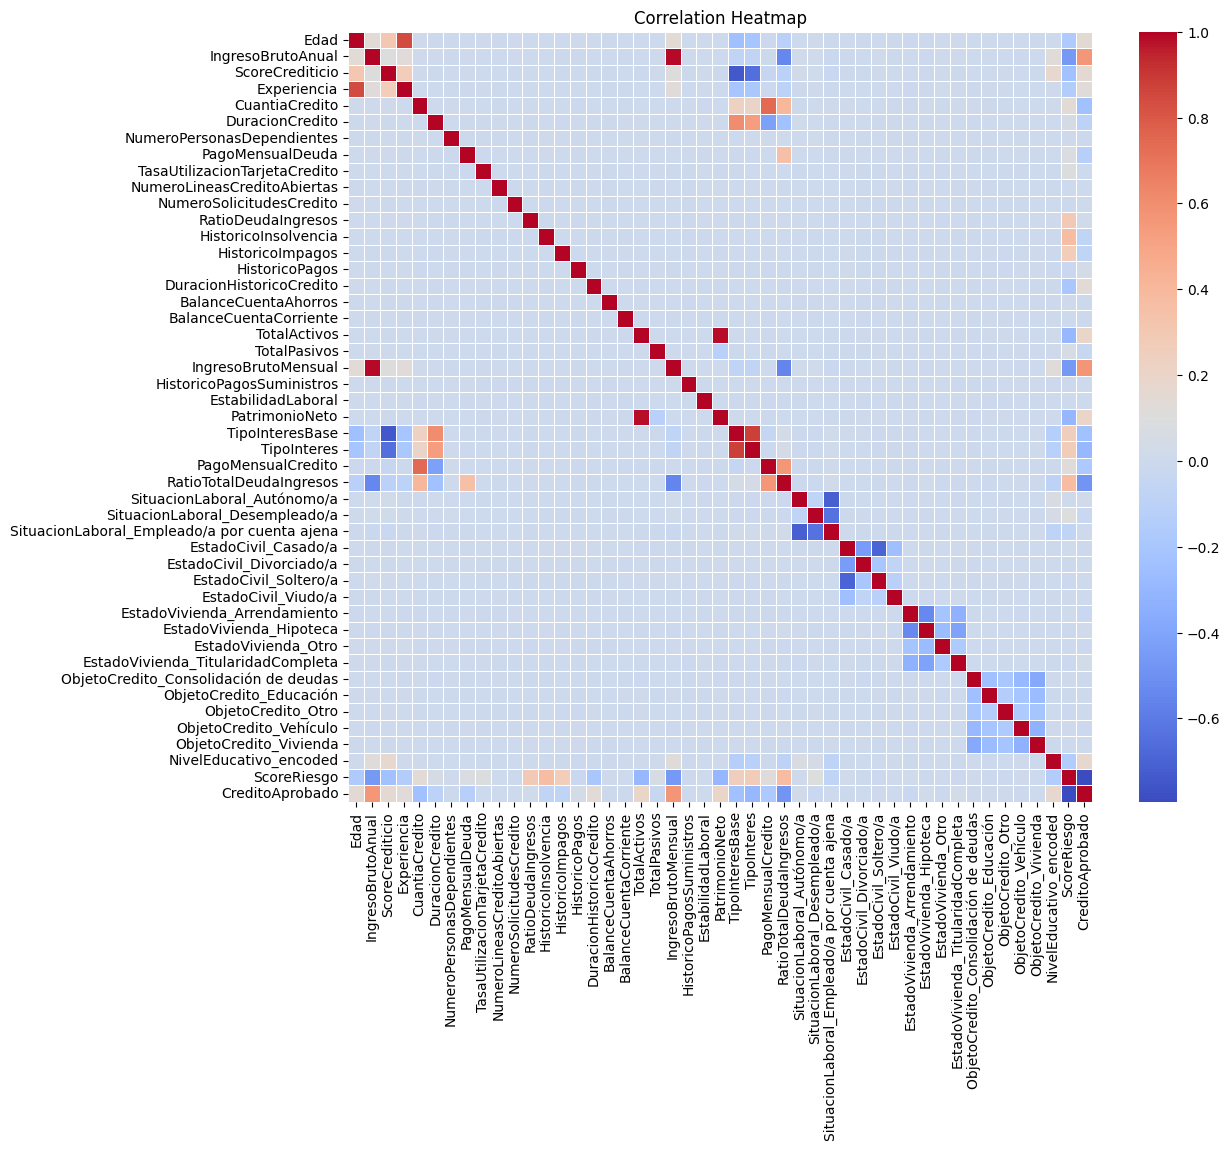

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(classification_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

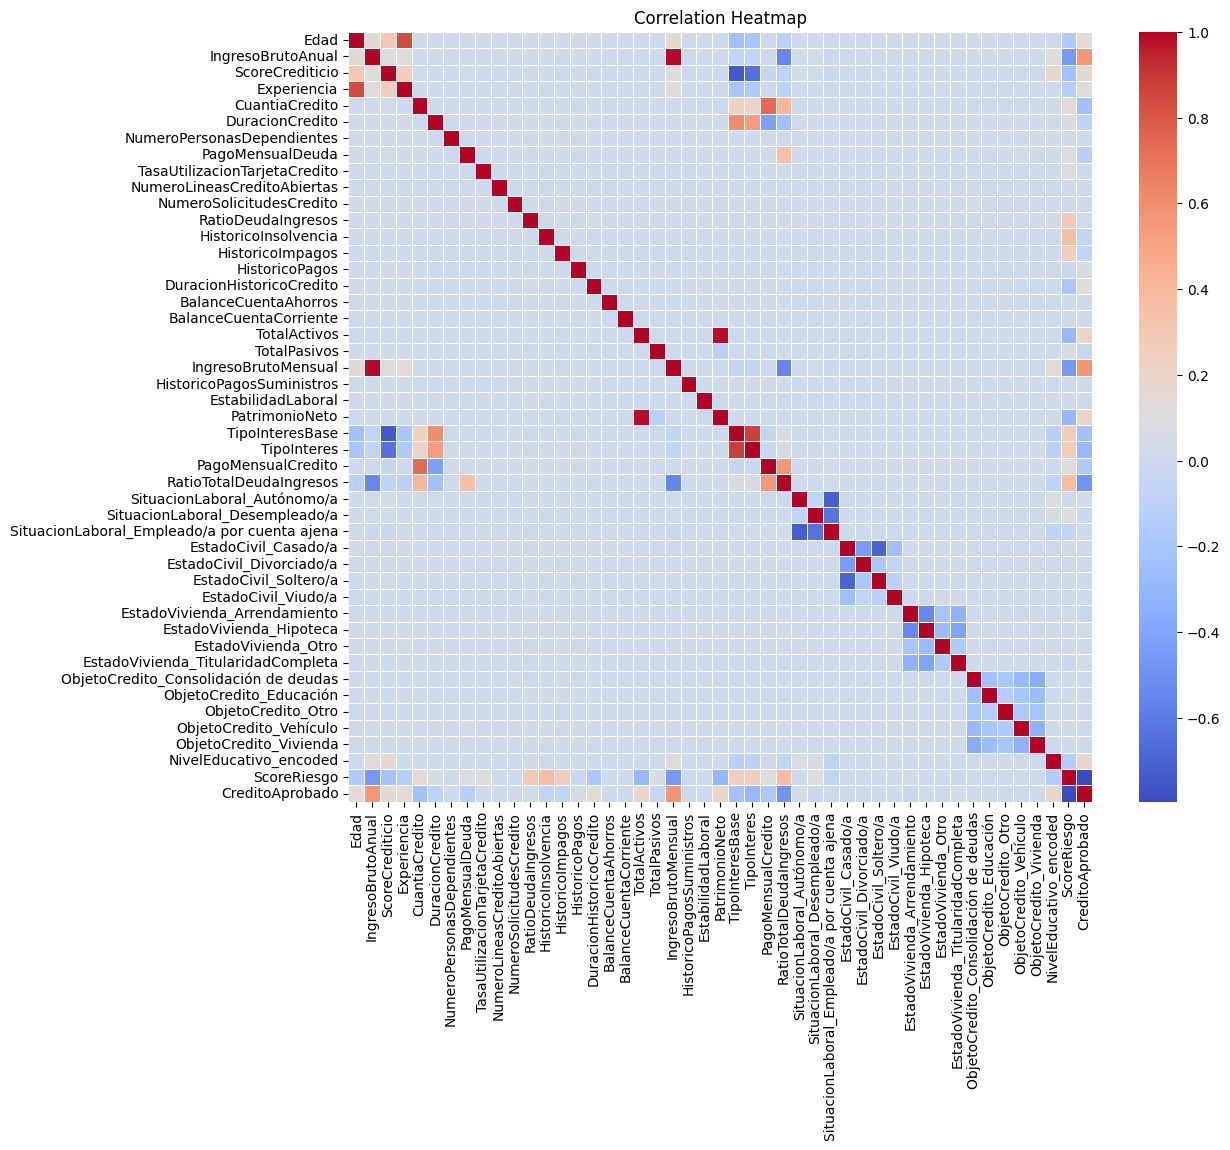

In [ ]:
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(regression_corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Select the most correlated features to the target

In [ ]:
classification_corr_matrix["CreditoAprobado"].sort_values(ascending=False)

CreditoAprobado                                 1.000000
IngresoBrutoMensual                             0.567037
IngresoBrutoAnual                               0.562940
PatrimonioNeto                                  0.199981
TotalActivos                                    0.195800
NivelEducativo_encoded                          0.172115
ScoreCrediticio                                 0.152421
Edad                                            0.144951
DuracionHistoricoCredito                        0.132468
Experiencia                                     0.126036
HistoricoPagos                                  0.039394
EstadoVivienda_TitularidadCompleta              0.025768
SituacionLaboral_Autónomo/a                     0.023178
EstadoVivienda_Hipoteca                         0.012876
RatioDeudaIngresos                              0.011842
ObjetoCredito_Educación                         0.008673
EstadoCivil_Soltero/a                           0.006030
ObjetoCredito_Otro             

In [ ]:
regression_corr_matrix["ScoreRiesgo"].sort_values(ascending=False)

ScoreRiesgo                                     1.000000
RatioTotalDeudaIngresos                         0.377181
HistoricoInsolvencia                            0.369541
RatioDeudaIngresos                              0.295059
TipoInteres                                     0.272761
HistoricoImpagos                                0.268767
TipoInteresBase                                 0.253332
CuantiaCredito                                  0.140501
PagoMensualCredito                              0.115000
SituacionLaboral_Desempleado/a                  0.097526
TasaUtilizacionTarjetaCredito                   0.094319
PagoMensualDeuda                                0.080016
DuracionCredito                                 0.059089
TotalPasivos                                    0.056611
EstadoVivienda_Arrendamiento                    0.021341
EstadoCivil_Casado/a                            0.009459
NumeroPersonasDependientes                      0.006970
BalanceCuentaCorriente         

By looking at the results we can see that the attributes that are good for the classification problem are not necessarily the same for the regression problem. We believe that there are some attributes that do not imapct the decision of granting the credit or predicting the ScoreRiesgo so we will use only the values that we believe have an impact on the results either in a positive or negative way.


In [ ]:
# get the column names of the attributes with a corrleation higher than ||0.15|| with 'ScoreRiesgo'
regression_attributes_corr = list(regression_corr_matrix["ScoreRiesgo"][abs(regression_corr_matrix["ScoreRiesgo"]) > 0.15].index)

# get the column names of the attributes with a corrleation higher than ||0.15|| with 'CreditoAprobado'
classification_attributes_corr = list(classification_corr_matrix["CreditoAprobado"][abs(classification_corr_matrix["CreditoAprobado"]) > 0.15].index)

In [ ]:
regression_attributes_corr

['Edad',
 'IngresoBrutoAnual',
 'ScoreCrediticio',
 'RatioDeudaIngresos',
 'HistoricoInsolvencia',
 'HistoricoImpagos',
 'DuracionHistoricoCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'RatioTotalDeudaIngresos',
 'ScoreRiesgo',
 'CreditoAprobado']

In [ ]:
classification_attributes_corr

['IngresoBrutoAnual',
 'ScoreCrediticio',
 'CuantiaCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'PagoMensualCredito',
 'RatioTotalDeudaIngresos',
 'NivelEducativo_encoded',
 'ScoreRiesgo',
 'CreditoAprobado']

In [ ]:
# drop 'ScoreRiesgo' and 'CreditoAprobado' from the list
classification_attributes_corr.remove('ScoreRiesgo')
classification_attributes_corr.remove('CreditoAprobado')
regression_attributes_corr.remove('ScoreRiesgo')
regression_attributes_corr.remove('CreditoAprobado')

### Remove highly correlated columns

We will remove this column entirely since it is basically the same as 'IngresoBrutoMensual'

In [ ]:
# remove IngresoBrutoAnual because it is highly correlated with IngresoBrutoMensual
classification_attributes_corr.remove('IngresoBrutoAnual')
regression_attributes_corr.remove('IngresoBrutoAnual')

# already removed by the filter done above
# # classification_attributes_corr.remove('Experiencia')
# already removed by the filter done above
# # regression_attributes_corr.remove('Experiencia')

In [ ]:
# create a new DataFrame with the selected attributes
classification_train_data_prepared = classification_data_prepared[classification_attributes_corr]

regression_train_data_prepared = regression_data_prepared[regression_attributes_corr]

## Feature Scaling

We will normalize all the data for the models to perform better and be more accurate

In [ ]:
# perform feature scaling in the credit_data_prepared DataFrame
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

classification_data_prepared_scaled = scaler.fit_transform(classification_train_data_prepared)

classification_data_prepared_scaled = pd.DataFrame(classification_data_prepared_scaled, columns=classification_train_data_prepared.columns, index=classification_train_data_prepared.index)

scaler = StandardScaler()

regression_data_prepared_scaled = scaler.fit_transform(regression_train_data_prepared)

regression_data_prepared_scaled = pd.DataFrame(regression_data_prepared_scaled, columns=regression_train_data_prepared.columns, index=regression_train_data_prepared.index)

In [ ]:
classification_data_prepared_scaled.head()

,ScoreCrediticio,CuantiaCredito,TotalActivos,IngresoBrutoMensual,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,NivelEducativo_encoded
Id,,,,,,,,,,
12215,-0.164848,-0.104707,-0.615336,-0.507426,-0.560496,-0.343776,-0.198534,0.014882,-0.320224,-1.491541
9822,-0.244034,-0.059308,-0.628844,-0.111865,-0.519237,0.019031,-0.141302,-0.204287,-0.667177,-1.491541
5971,0.824976,-0.783606,0.309176,8.270858,-0.061528,-1.238561,-0.771985,-0.530724,-1.292603,1.302087
35334,0.646807,-0.852445,-0.282511,-0.878177,-0.173817,-0.536239,-0.367437,-0.796906,-0.226911,0.370877
36697,0.567622,0.612065,-0.511972,-0.066399,-0.559462,-0.716029,-1.005008,0.481663,-0.335080,-0.560332


In [ ]:
regression_data_prepared_scaled.head()

,Edad,ScoreCrediticio,RatioDeudaIngresos,HistoricoInsolvencia,HistoricoImpagos,DuracionHistoricoCredito,TotalActivos,IngresoBrutoMensual,PatrimonioNeto,TipoInteresBase,TipoInteres,RatioTotalDeudaIngresos
Id,,,,,,,,,,,,
39088,-0.152511,0.725878,0.292207,-0.231401,-0.336196,-1.678795,-0.705088,-0.026813,-0.532704,0.359946,0.384985,-0.277863
30894,-0.152511,-1.751028,-1.094745,-0.231401,2.974452,-0.363308,0.981496,-0.339925,1.125729,0.937785,1.013412,-0.434046
45279,-0.840823,0.012529,-0.719787,-0.231401,-0.336196,-0.961256,-0.244743,0.462584,-0.442371,1.550397,0.672255,0.584324
16399,-0.324589,-0.482852,0.275543,-0.231401,-0.336196,1.191359,0.006257,0.602595,-0.537498,-0.505943,-0.415352,-0.816953
13654,-0.238550,-0.542298,-0.080388,-0.231401,2.974452,-0.722077,-0.616264,-0.022925,-0.512863,0.417315,1.139143,1.393760


In [ ]:
regression_attributes_corr

['Edad',
 'ScoreCrediticio',
 'RatioDeudaIngresos',
 'HistoricoInsolvencia',
 'HistoricoImpagos',
 'DuracionHistoricoCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'RatioTotalDeudaIngresos']

In [ ]:
classification_attributes_corr

['ScoreCrediticio',
 'CuantiaCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'PagoMensualCredito',
 'RatioTotalDeudaIngresos',
 'NivelEducativo_encoded']

# Create Pipeline

The pipeline will allow us to do everything that we did in the previous step all together so that when we run the model we will use the output of the pipeline to prepare the data to be trained. This will be the code that will be used in the script for the competition

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

classification_attributes_corr = ['ScoreCrediticio',
 'CuantiaCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'PagoMensualCredito',
 'RatioTotalDeudaIngresos'
 ]

regression_attributes_corr = ['Edad',
 'ScoreCrediticio',
 'RatioDeudaIngresos',
 'HistoricoInsolvencia',
 'HistoricoImpagos',
 'DuracionHistoricoCredito',
 'TotalActivos',
 'IngresoBrutoMensual',
 'PatrimonioNeto',
 'TipoInteresBase',
 'TipoInteres',
 'RatioTotalDeudaIngresos',
 ]

categorical_columns = ['SituacionLaboral', 'EstadoCivil', 'EstadoVivienda', 'ObjetoCredito']
ordinal_column = ['NivelEducativo']
education_level_order = ['FP', 'Bachillerato', 'Grado universitario', 'Máster', 'Doctorado']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder(categories=[education_level_order], handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine all transformers into a ColumnTransformer
classification_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, classification_attributes_corr),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_column)
    ],
    remainder='drop'  # This will drop any columns not specified in the transformers
)

regression_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, regression_attributes_corr),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_column)
    ],
    remainder='drop'  # This will drop any columns not specified in the transformers
)

# Define the pipeline
classification_pipeline = Pipeline(steps=[
    ('preprocessor', classification_preprocessor)
])

regression_pipeline = Pipeline(steps=[
    ('preprocessor', regression_preprocessor)
])

# Applying pipeline to classification train_data

In [ ]:
# Applying the pipeline to classification train_data
classification_train_data_processed = classification_pipeline.fit_transform(classification_train_data)


# Convert the output back to a DataFrame if needed, with appropriate column names
classification_train_data_df = pd.DataFrame(
    classification_train_data_processed,
    columns=(
        classification_attributes_corr
        +
        list(classification_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)) +
        ['NivelEducativo_encoded']
    ),
    index=classification_train_data.index
)

classification_train_data_df['CreditoAprobado'] = classification_credit_data_labels['CreditoAprobado']
classification_train_data_df['ScoreRiesgo'] = classification_credit_data_labels['ScoreRiesgo']

In [ ]:
len(classification_train_data_df.columns)

28

# Applying pipeline to regression train_data

In [ ]:
# Applying the pipeline to regression train data

regression_train_data_processed = regression_pipeline.fit_transform(regression_train_data)

# Convert the output back to a DataFrame if needed, with appropriate column names
regression_train_data_df = pd.DataFrame(
    regression_train_data_processed,
    columns=(
        regression_attributes_corr
        +
        list(regression_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)) +
        ['NivelEducativo_encoded']
    ),
    index=regression_train_data.index
)

regression_train_data_df['CreditoAprobado'] = regression_credit_data_labels['CreditoAprobado']
regression_train_data_df['ScoreRiesgo'] = regression_credit_data_labels['ScoreRiesgo']

In [ ]:
len(regression_train_data_df.columns)

31

# Applying pipeline to classification test_data

In [ ]:
# Applying the pipeline to classification test_data
classification_test_data_processed = classification_pipeline.transform(classification_test_data)

# Convert the output back to a DataFrame if needed, with appropriate column names
classification_test_data_df = pd.DataFrame(
    classification_test_data_processed,
    columns=(
        classification_attributes_corr
        +
        list(classification_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)) +
        ['NivelEducativo_encoded']
    ),
    index=classification_test_data.index
)

classification_test_data_df['CreditoAprobado'] = classification_test_data['CreditoAprobado']
classification_test_data_df['ScoreRiesgo'] = classification_test_data['ScoreRiesgo']

# Applying pipeline to regression test_data

In [ ]:
# Applying the pipeline to regression test_data
regression_test_data_processed = regression_pipeline.transform(regression_test_data)

# Convert the output back to a DataFrame if needed, with appropriate column names
regression_test_data_df = pd.DataFrame(
    regression_test_data_processed,
    columns=(
        regression_attributes_corr
        +
        list(regression_pipeline.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_columns)) +
        ['NivelEducativo_encoded']
    ),
    index=regression_test_data.index
)

regression_test_data_df['CreditoAprobado'] = regression_test_data['CreditoAprobado']
regression_test_data_df['ScoreRiesgo'] = regression_test_data['ScoreRiesgo']

# Try out different classification algorithms
Now that the data is prepared, we will proceed to train different models to evaluate their performance. The goal is to determine which model performs best in classifying clients into either receiving credit approval or not.

In [ ]:
def filter_column(data,class_label):
  x = data.iloc[:, :-2]
  y = data[class_label]
  return x,y

This method allows to remove the labels (last two rows of the dataset) and only return the label that we want to evaluate against

In [ ]:
X_train, y_train = filter_column(classification_train_data_df, "CreditoAprobado")
X_test, y_test = filter_column(classification_test_data_df, "CreditoAprobado")

## Random Forest
This classification model also allows us to test relations between the features.
First we want to see if a GridSearch can help us decide which should be the depth of the tree and how many estimators.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [None, 10, 15, 20] ,# Try different values including None for no limit
    'n_estimators': [100, 150, 200]  # Try different values,

}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")

Best max_depth: None
Best n_estimators: 200


Once we get the best parameters (max_depth=None, n_estimators=200), we train a model with those.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=None)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)


Training Accuracy: 1.0
Test Accuracy: 0.9205
Precision (Train): 1.0
Precision (Test): 0.8867173362287368
F1-Score (Train): 1.0
F1-Score (Test): 0.8604038630377524
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7068
           1       0.89      0.84      0.86      2932

    accuracy                           0.92     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.92      0.92      0.92     10000

ROC-AUC Score: 0.9765016086182097
Confusion Matrix:
 [[6755  313]
 [ 482 2450]]


We don´t like the outputs that were return by these methods since the values that return end up overfitting the model to the available data to train

In order to improve, we repeat the gridSearch with other parameters.

In [ ]:
param_grid = {
    'max_depth': [10, 20],
    'n_estimators': [100, 200],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")
print(f"Best min_samples_split: {grid_search.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {grid_search.best_params_['min_samples_leaf']}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best max_depth: 20
Best n_estimators: 200
Best min_samples_split: 5
Best min_samples_leaf: 2


After the model was trained and the best parameters were predicted (max_depth=20, n_estimators=200,min_samples_split=5,min_samples_leaf=2) we tried out a new model.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2
)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

y_pred_proba = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)


Training Accuracy: 0.9953
Test Accuracy: 0.9189
Precision (Train): 0.9965582515918087
Precision (Test): 0.8786147804355587
F1-Score (Train): 0.9919492977046934
F1-Score (Test): 0.8585382871097157
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7068
           1       0.88      0.84      0.86      2932

    accuracy                           0.92     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.92      0.92      0.92     10000

ROC-AUC Score: 0.9757144781815472
Confusion Matrix:
 [[6728  340]
 [ 471 2461]]


Even thought the data seems less overfitted, we got better test accuracy and precision with the parameters mentioned in the first try.
Now we are going to try other mechanism to optimize these results.

## Gradient Boost (XGBoost)
Another possible model that we will test. This one combines multiple weak learners to create a final model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(objective='binary:logistic')

param_grid = {
    'max_depth': [2, 5, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150,200],
    'colsample_bytree': [0.7],
    'subsample': [0.8],
    'eval_metric': ['logloss']
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'colsample_bytree': 0.7, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, confusion_matrix
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.1, n_estimators=200, use_label_encoder=False, eval_metric='logloss',subsample=0.8,colsample_bytree=0.7)
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

# Calcular el ROC-AUC
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:45:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9735
Test Accuracy: 0.9505
Precision (Train): 0.9609469500604804
Precision (Test): 0.9206075250258888
F1-Score (Train): 0.9545142464812908
F1-Score (Test): 0.9150797735460627
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      7068
           1       0.92      0.91      0.92      2932

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

ROC-AUC Score: 0.9902636037680348
Confusion Matrix:
 [[6838  230]
 [ 265 2667]]


Analyzing the results, we can gather a lot of information:

*   The accuracy on the training set is 0.97 and on the test set 0.95. This indicates that the model is robust in its predictions and doesn't seem to overfit, as the difference between the training and test accuracy is very small (<2%).
*   Regarding precision (the number of samples classified as positive out of the total positive samples), we observe that the percentage drops slightly, obtaining 0.96 in training and 0.92 in the test.
*   As for the F1 score, which is the harmonic mean between precision and recall, we get values of 0.95 in training and 0.91 in the test. Again, the difference is not significant, suggesting that the model generalizes well.

Next, we analyze the predictions for each class:
*   Class 0: Precision: 0.97, Recall: 0.97, F1: 0.97
*   Class 1: Precision: 0.92, Recall: 0.91, F1: 0.92

For class 0 (Not granting credit), the model seems to perform well, with high values for precision, recall, and F1. However, for class 1 (Granting credit), the results are somewhat lower, suggesting that there are more false negatives compared to class 0.

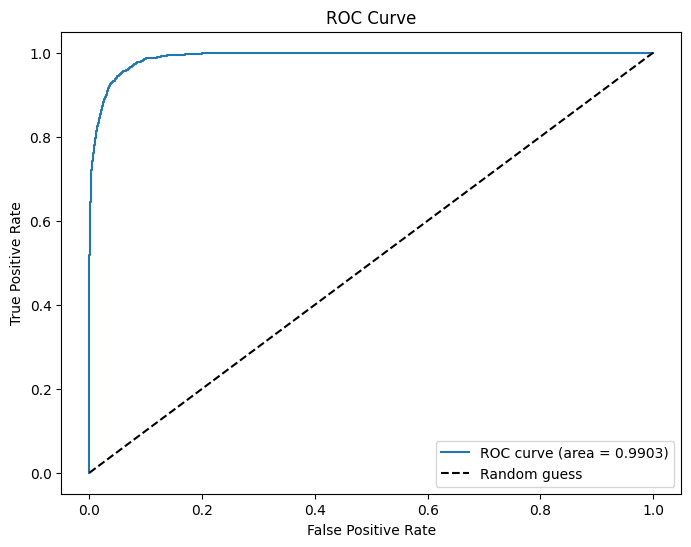

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The AUC (Area Under the ROC Curve) is a metric used to evaluate the model's ability to discriminate between classes. A value of 0.9698 indicates that the model has very good classification performance, effectively distinguishing between positive and negative classes.

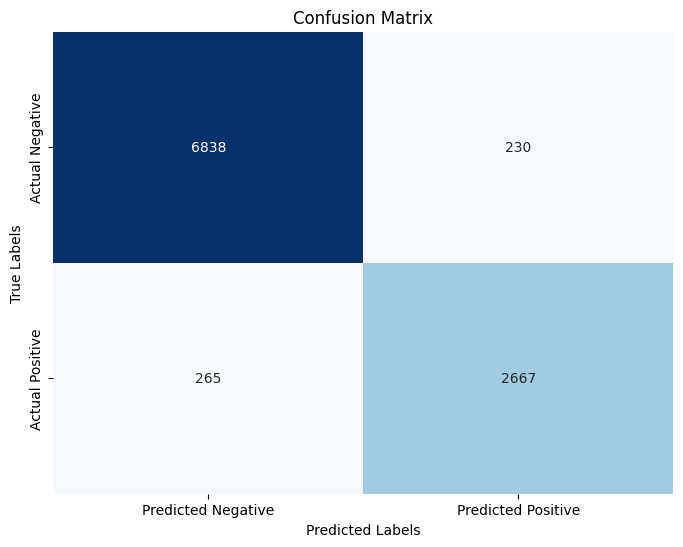

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Regarding the confusion matrix, we can observe that, as we expected, our model performs better with negative values, correctly predicting 6,838 negative values. However, it performs worse with positive values, as 265 samples from the test set were classified as negative despite being positive (they should have been granted credit).

To try to improve the model, a grid search will be conducted to test different parameters of our XGBoost.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'colsample_bytree': [0.3],
    'subsample': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(objective='binary:logistic')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'colsample_bytree': 0.3,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

After this process, we found that the best combination of parameters for our model is 'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1. With these, we create and train a new model.

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.2, n_estimators=200, use_label_encoder=False, eval_metric='logloss',colsample_bytree= 0.3, subsample=1.0)
xgb_model.fit(X_train, y_train)
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

# Calcular el ROC-AUC
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:31:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.98125
Test Accuracy: 0.9502
Precision (Train): 0.9709212557900154
Precision (Test): 0.9208160442600276
F1-Score (Train): 0.9679322729604926
F1-Score (Test): 0.9144917582417582
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      7068
           1       0.92      0.91      0.91      2932

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

ROC-AUC Score: 0.9757144781815472
Confusion Matrix:
 [[6839  229]
 [ 269 2663]]


We can observe that with these new parameters, the model seems to improve, increasing the accuracy (0.9812 and 0.9502), precision (0.97 and 0.92), and F1 score (0.967 and 0.914) both in the training and test sets.

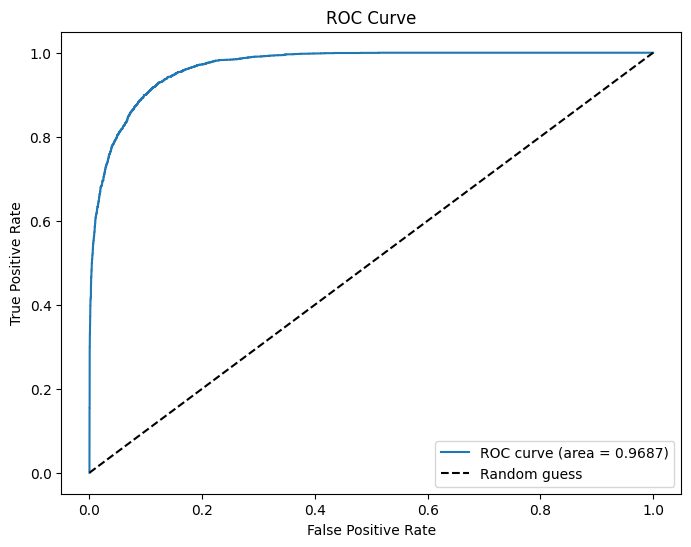

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

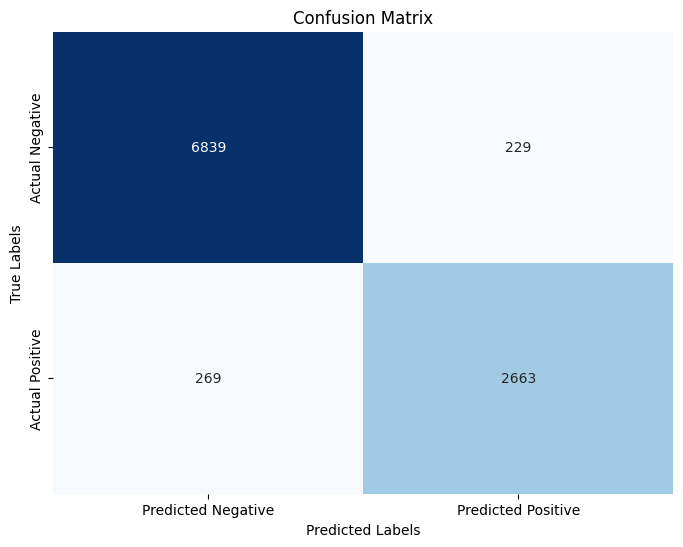

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Additionally, if we look at the confusion matrix, we can see a significant reduction in the number of False Negatives (the main issue with the previous model) and, to a lesser extent, False Positives.

We can see that this one performed MUCH better than Random Forest.

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Define the model
model = LogisticRegression()

# Define the parameters grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and l2 regularization
    'max_iter': [500, 1000, 2000, 3000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score: {:.3f}".format(test_score))

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
320 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best parameters found:  {'C': 0.1, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.851
Test set score: 0.914


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, confusion_matrix

log_reg = LogisticRegression(max_iter=2000, C=0.1, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")
# Calcular el ROC-AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Training Accuracy: 0.9138
Test Accuracy: 0.9142
Precision (Train): 0.8624190442849641
Precision (Test): 0.8636044880785414
F1-Score (Train): 0.8510969079288305
F1-Score (Test): 0.8516597510373444
ROC-AUC Score: 0.9725539892727904
Confusion Matrix:
 [[6679  389]
 [ 469 2463]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")
# Calcular el ROC-AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Training Accuracy: 0.9138
Test Accuracy: 0.9133
Precision (Train): 0.8625459639292593
Precision (Test): 0.861646234676007
F1-Score (Train): 0.8510711817553559
F1-Score (Test): 0.8501814411612234
ROC-AUC Score: 0.9725652326146089
Confusion Matrix:
 [[6673  395]
 [ 472 2460]]


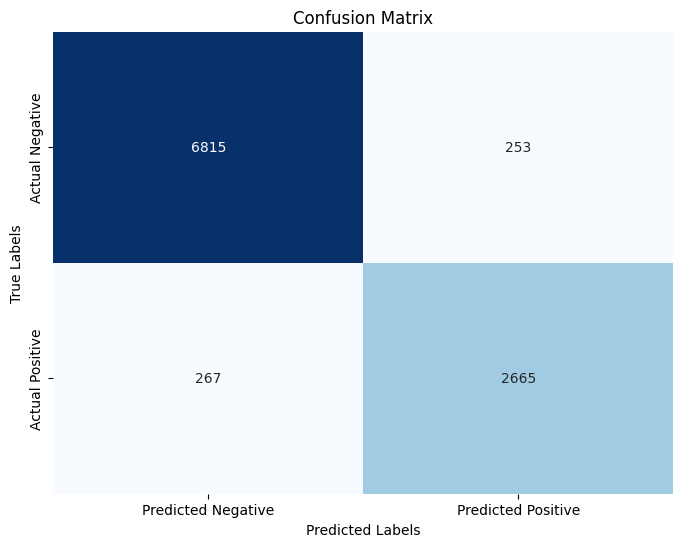

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The logistic regression is better than Random Forest but not as good as the Gradient Boost (XGBoost)

## Decision Tree

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best min_samples_split: {grid_search.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {grid_search.best_params_['min_samples_leaf']}")

Best max_depth: 10
Best min_samples_split: 15
Best min_samples_leaf: 6


Using gridSearch we get that the best parameters are max_depth=10, min_samples_plit=15 and min_samples_leaf= 6.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=6, min_samples_split=15)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")
# Calcular el ROC-AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Training Accuracy: 0.9317
Test Accuracy: 0.8917
Precision (Train): 0.8968071970365143
Precision (Test): 0.8265630519251148
F1-Score (Train): 0.8815675394485868
F1-Score (Test): 0.8120770432066632
ROC-AUC Score: 0.9446491006098621
Confusion Matrix:
 [[6577  491]
 [ 592 2340]]


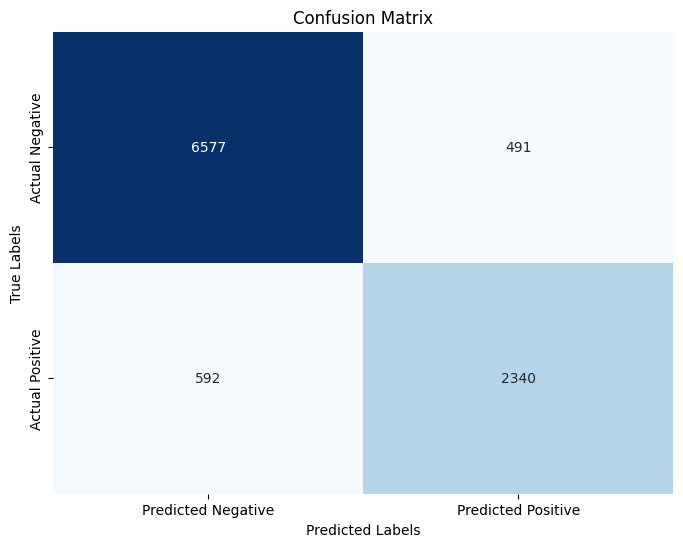

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We see the results are not as good as the previous algorithms so we won't be using this one

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(26, 13), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision (Train): {precision_train}")
print(f"Precision (Test): {precision_test}")
print(f"F1-Score (Train): {f1_train}")
print(f"F1-Score (Test): {f1_test}")

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

# Calcular el ROC-AUC
y_pred_proba = mlp.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Training Accuracy: 0.96555
Test Accuracy: 0.9528
Precision (Train): 0.9410361281526926
Precision (Test): 0.9195088676671214
F1-Score (Train): 0.9412767408165005
F1-Score (Test): 0.9195088676671214
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7068
           1       0.92      0.92      0.92      2932

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000

ROC-AUC Score: 0.9911397641002122
Confusion Matrix:
 [[6832  236]
 [ 236 2696]]


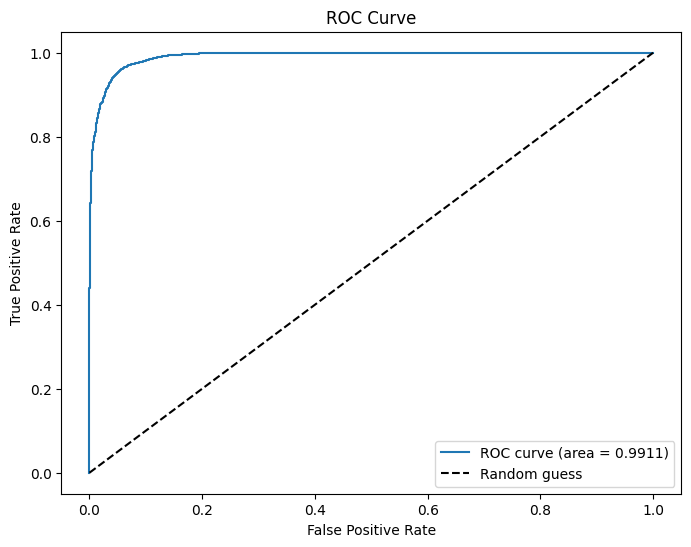

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

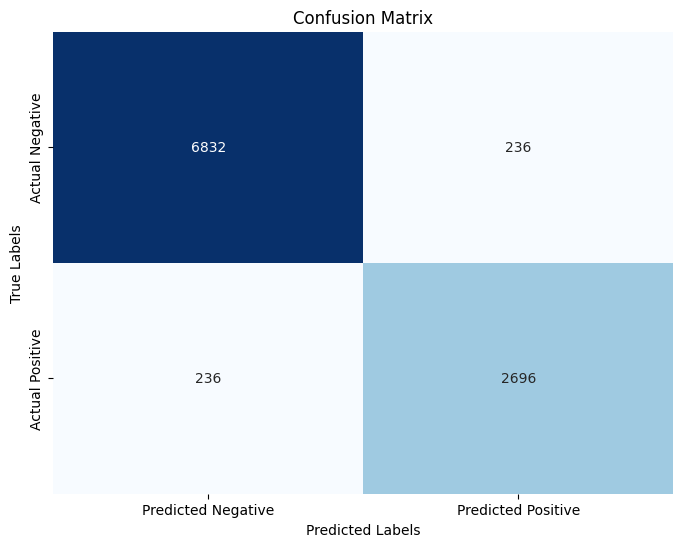

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Due to the size of the dataset we can't have a big Neural Network as it will overfit the test data. We tried out different sizes and number of neurons per layer and we've got excelent results by using two layers where the first one has the same number of neurons as attributes.
It is slightly better than Gradient Boost

## Different classification algorithms conclussion
We tested 5 different models and in general we've got good results from them. There are two clear winners - MLP and Gradient Boost considering the metrics used and the results given. Therefore, regarding the number of predicted errors in the confusion matrix, MLP got the least so that will the chosen model.

# Try out different regression algorithms

At this point, we will proceed with the next approach, which consists of predicting the risk score (score riesgo) for each client. We will be trying regressor models that appears in the following image:

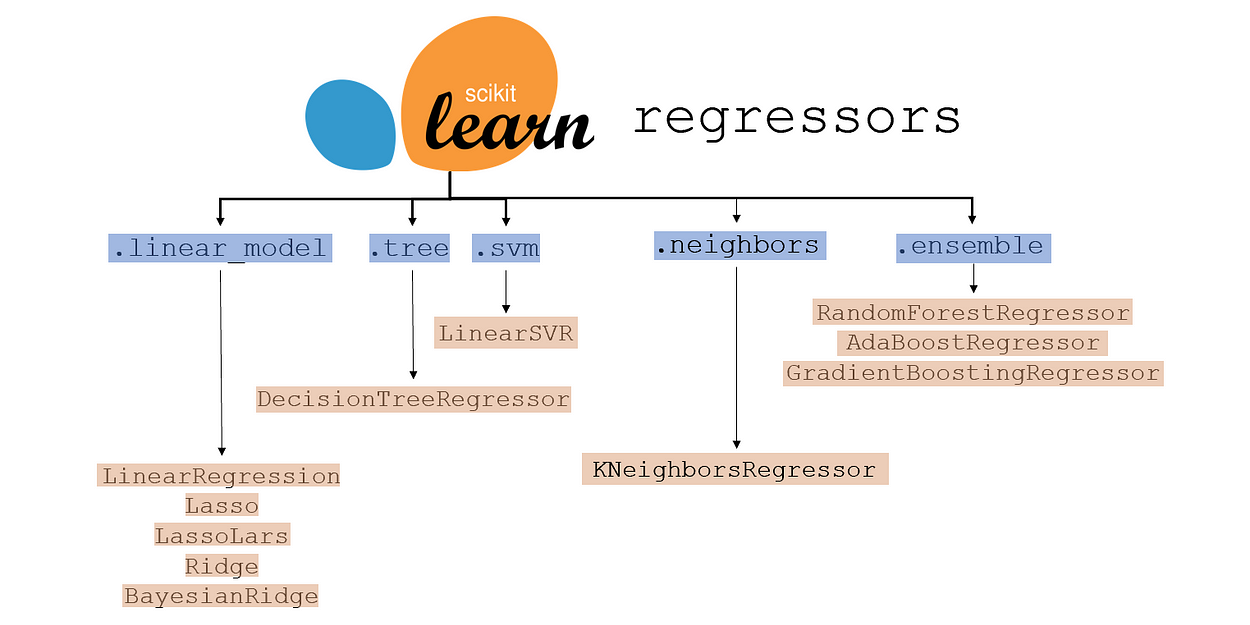

In [ ]:
X_train, y_train = filter_column(regression_train_data_df, "ScoreRiesgo")
X_test, y_test = filter_column(regression_test_data_df, "ScoreRiesgo")

## LinearRegression

First, we implement LinearRegression. The goal is to find the best-fit line that minimizes the difference between the predicted and actual values of the target variable.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

np.column_stack((y_test, y_pred))

array([[54.       , 54.15625  ],
       [48.       , 45.7421875],
       [53.       , 46.921875 ],
       ...,
       [44.       , 49.1015625],
       [51.2      , 58.4921875],
       [68.       , 75.75     ]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {lr.score(X_train, y_train)}")
print(f"Training Score (Test): {lr.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7483890063514281
Training Score (Test): 0.7520001183558844
Mean Absolute Error (Train): 3.2050765234374996
Mean Absolute Error (Test): 3.2171517187500003
Mean Squared Error (Test): 15.553282460205073
Mean Squared Error (Train): 15.77686714654541


Once we have applied LinearRegression, we can see that for all metrics (R, MAE, MSE), the results are similar between the training and test sets, and therefore, overfitting does not occur. However, there is still room for improvement.

## Ridge
Now we apply Ridge regression that imposes a penalty on the size of the coefficients, preventing overfitting by shrinking the coefficients of less important features. Before that, we will apply Grid Search and  optimize for Mean Absolute Error (MAE)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge Regression model
ridge = Ridge()

# Define the parameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000]  # Different levels of regularization
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters:  {'alpha': 0.01}
Best MAE:  3.161967809848034


The best alpha is 0.01. Now we apply it to a new model.


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
y_pred_train = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.38427871],
       [48.        , 46.87116113],
       [53.        , 47.60493415],
       ...,
       [44.        , 48.90868047],
       [51.2       , 57.76517668],
       [68.        , 74.09383182]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {ridge.score(X_train, y_train)}")
print(f"Training Score (Test): {ridge.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7536654613694942
Training Score (Test): 0.75856247543561
Mean Absolute Error (Train): 3.1601191206261348
Mean Absolute Error (Test): 3.1712678678698816
Mean Squared Error (Test): 15.141725032882732
Mean Squared Error (Train): 15.446015427319571


The results in both cases are practically the same and very similar to those from Linear Regression.
This could indicate that:

* The data does not have multicollinearity or noise that requires regularization.
* Linear Regression is sufficient for this particular dataset, as Ridge is not improving performance.

## Lasso

Now we apply the Lasso Regression algorithm which stands for Least Absolute Shrinkage and Selection Operator, is similar to Ridge Regression but uses L1 regularization.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize the Lasso Regression model
lasso = Lasso()

# Define the parameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Different levels of regularization
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:  {'alpha': 0.01}
Best MAE:  3.164456348252983


The alpha for the best model will be 0.01.

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.32010269],
       [48.        , 46.98273693],
       [53.        , 47.5326186 ],
       ...,
       [44.        , 48.93235955],
       [51.2       , 57.48659123],
       [68.        , 73.54374185]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {lasso.score(X_train, y_train)}")
print(f"Training Score (Test): {lasso.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7535134704073834
Training Score (Test): 0.758621917580693
Mean Absolute Error (Train): 3.1630849206386293
Mean Absolute Error (Test): 3.1726570945265737
Mean Squared Error (Test): 15.137997125972504
Mean Squared Error (Train): 15.455545778843268


These metrics are a bit worse than those showed in Ridge.

## LassoLars
Now we implement LassoLARS.

In [ ]:
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV

# Initialize the LassoLars model
lasso_lars = LassoLars()

# Define the parameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Different levels of regularization
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=lasso_lars, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters:  {'alpha': 0.01}
Best MAE:  3.164455613934794


Best alpha still 0.01.

In [ ]:
from sklearn.linear_model import LassoLars
lassolars = LassoLars(alpha=0.01)
lassolars.fit(X_train, y_train)
y_pred_train = lassolars.predict(X_train)
y_pred = lassolars.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.32019427],
       [48.        , 46.98526288],
       [53.        , 47.53189815],
       ...,
       [44.        , 48.92963769],
       [51.2       , 57.46885371],
       [68.        , 73.53915501]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {lassolars.score(X_train, y_train)}")
print(f"Training Score (Test): {lassolars.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7535129312786049
Training Score (Test): 0.7586273126445513
Mean Absolute Error (Train): 3.1630854618369026
Mean Absolute Error (Test): 3.1726173540827913
Mean Squared Error (Test): 15.137658775197805
Mean Squared Error (Train): 15.455579584055796


We still getting similar results.

## BayesianRidge

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge


param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],  # Prior on the precision of the weights
    'alpha_2': [1e-6, 1e-5, 1e-4],  # Prior on the precision of the noise
    'lambda_1': [1e-6, 1e-5, 1e-4],  # Prior on the variance of the weights
    'lambda_2': [1e-6, 1e-5, 1e-4]   # Prior on the variance of the noise
}

# Initialize the Bayesian Ridge model
bayesian_ridge = BayesianRidge()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=bayesian_ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:  {'alpha_1': 0.0001, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 0.0001}
Best MAE:  3.1621502872037155


This time, the best parameters are alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06 and lambda_2= 0.0001





In [ ]:
bayesianridge = BayesianRidge(alpha_1=0.0001, alpha_2=1e-06, lambda_1=1e-06,lambda_2=0.0001)
bayesianridge.fit(X_train, y_train)
y_pred_train = bayesianridge.predict(X_train)
y_pred = bayesianridge.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.3853852 ],
       [48.        , 46.872023  ],
       [53.        , 47.60666444],
       ...,
       [44.        , 48.91124922],
       [51.2       , 57.76407906],
       [68.        , 74.08395225]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {bayesianridge.score(X_train, y_train)}")
print(f"Training Score (Test): {bayesianridge.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7536653037714587
Training Score (Test): 0.7585576836885369
Mean Absolute Error (Train): 3.160269574551708
Mean Absolute Error (Test): 3.1714364366974013
Mean Squared Error (Test): 15.14202554671851
Mean Squared Error (Train): 15.446025309253717


These are similar results as with linear regressor.

## Stochastic Gradient Descent Regressor
Stochastic Gradient Descent (SGD) Regressor is a variant of the gradient descent optimization that updates the model's parameters based on a single randomly selected data point.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the SGDRegressor model
sgd_regressor = SGDRegressor(max_iter=2000, tol=1e-3)

# Define the parameter grid for the hyperparameters
param_grid = {
    'alpha': [0.0001, 0.01, 0.1],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Type of regularization
    'learning_rate': ['invscaling', 'adaptive'],  # Learning rate strategy
    'eta0': [0.01],
    'early_stopping': [True]
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'alpha': 0.0001, 'early_stopping': True, 'eta0': 0.01, 'learning_rate': 'invscaling', 'penalty': 'l2'}
Best MAE:  3.1513803054072826


The will be chosing a model with alpha=0.0001, early_stopping=True, eta0=0.01, learning_rate= 'invscaling' and penalty='l2'

In [ ]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.0001, early_stopping=True, eta0=0.01, learning_rate='invscaling', penalty='l2')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.28680558],
       [48.        , 46.97451643],
       [53.        , 47.35190605],
       ...,
       [44.        , 49.05470692],
       [51.2       , 57.90531405],
       [68.        , 74.0259593 ]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {reg.score(X_train, y_train)}")
print(f"Training Score (Test): {reg.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")

Training Score (Train): 0.7524241478460744
Training Score (Test): 0.7568954115585458
Mean Absolute Error (Train): 3.1824458901191037
Mean Absolute Error (Test): 3.192841483360152
Mean Squared Error (Test): 15.24627474148458
Mean Squared Error (Train): 15.523850017383461


We notice no significant change.

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisiontreeregressor = DecisionTreeRegressor()
decisiontreeregressor.fit(X_train, y_train)
y_pred_train = decisiontreeregressor.predict(X_train)
y_pred = decisiontreeregressor.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54. , 54. ],
       [48. , 35.2],
       [53. , 53. ],
       ...,
       [44. , 42.4],
       [51.2, 46.4],
       [68. , 68. ]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {decisiontreeregressor.score(X_train, y_train)}")
print(f"Training Score (Test): {decisiontreeregressor.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 1.0
Training Score (Test): 0.7118226421707992
Mean Absolute Error (Train): 1.7825740883381512e-16
Mean Absolute Error (Test): 2.1874
Mean Squared Error (Train): 2.2526712009491212e-30
Mean Squared Error (Test): 18.073007999999994


It looks like the regressor is overfitting, as indicated by a training score of 1.0 (perfect fit on the training data) and a significantly lower test score of 0.713. That´s a good reason to implement GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation R² Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 15}
Best Cross-Validation R² Score:  0.7853185666047151


Best parameters are max_depth=None, min_samples_split=15 and min_samples_leaf=10.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisiontreeregressor = DecisionTreeRegressor(max_depth=None, min_samples_split=15, min_samples_leaf=10)
decisiontreeregressor.fit(X_train, y_train)
y_pred_train = decisiontreeregressor.predict(X_train)
y_pred = decisiontreeregressor.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.        ],
       [48.        , 39.14666667],
       [53.        , 53.        ],
       ...,
       [44.        , 43.45      ],
       [51.2       , 50.30909091],
       [68.        , 68.5       ]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {decisiontreeregressor.score(X_train, y_train)}")
print(f"Training Score (Test): {decisiontreeregressor.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.908507665570333
Training Score (Test): 0.788800092731581
Mean Absolute Error (Train): 1.371104266015675
Mean Absolute Error (Test): 2.0888202080706533
Mean Squared Error (Train): 5.736881303526267
Mean Squared Error (Test): 13.245376536222155


So we got better results than when the model was overfitting, but it is still overfitting. Nevertheless, regarding MAE and MSE it is the best model so far.

## LinearSVR

This is type of regression model based on the concepts of Support Vector Machines (SVM), but adapted for regression tasks

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

# Initialize the LinearSVR model
linear_svr = LinearSVR(max_iter=10000)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'epsilon': [0.001, 0.01, 0.1, 1.0]  # Margin of error within which no penalty is given to errors
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=linear_svr, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative MAE: ", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\s

Best Parameters:  {'C': 10, 'epsilon': 0.001}
Best Negative MAE:  -3.035759336247512


Now we implement the model with C=10 and epsilon=0.001.

In [ ]:
from sklearn.svm import LinearSVR
linearsvr = LinearSVR(C=10, epsilon=0.001, max_iter=10000)
linearsvr.fit(X_train, y_train)
y_pred_train = linearsvr.predict(X_train)
y_pred = linearsvr.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.3600343 ],
       [48.        , 47.8468392 ],
       [53.        , 48.53730532],
       ...,
       [44.        , 51.03918607],
       [51.2       , 56.74003495],
       [68.        , 73.7702954 ]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {linearsvr.score(X_train, y_train)}")
print(f"Training Score (Test): {linearsvr.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.7209265529218973
Training Score (Test): 0.7344379205408169
Mean Absolute Error (Train): 3.032719875246727
Mean Absolute Error (Test): 3.039335222233194
Mean Squared Error (Train): 17.49885660731219
Mean Squared Error (Test): 16.654693563423738


These metrics could be improve by the following models.

## KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [2, 3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # How to weight the neighbors' contributions
    'p': [1, 2]  # Power parameter for Minkowski distance (1: Manhattan, 2: Euclidean)
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best MAE:  2.9273047120150784


Now the model will be configured with n_neighbors=7, p=2, weights='distance'.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7, p=2, weights='distance')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 51.81258964],
       [48.        , 47.83787459],
       [53.        , 51.87329281],
       ...,
       [44.        , 51.13305589],
       [51.2       , 55.60888047],
       [68.        , 67.66818391]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {knn.score(X_train, y_train)}")
print(f"Training Score (Test): {knn.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.9999999999999981
Training Score (Test): 0.7709907012839798
Mean Absolute Error (Train): 1.13463524214108e-07
Mean Absolute Error (Test): 2.865979821211387
Mean Squared Error (Train): 1.1678812646479283e-13
Mean Squared Error (Test): 14.362290358085962


Looking at the metrics we conclude it is overfitted but it still a good option.

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [150, 200],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 4]  # Minimum number of samples required in each leaf
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best MAE:  1.7171973732445438


Now we will create a RandomForest wit the params returned by the grid search: n_estimators=200, max_depth=20, min_samples_leaf=2 and min_samples_split=2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=2,random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 53.94569048],
       [48.        , 40.42293788],
       [53.        , 52.68943634],
       ...,
       [44.        , 45.18056889],
       [51.2       , 53.94706429],
       [68.        , 68.33314286]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {rf.score(X_train, y_train)}")
print(f"Training Score (Test): {rf.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.9741531489302433
Training Score (Test): 0.871707849332302
Mean Absolute Error (Train): 0.7438985217961441
Mean Absolute Error (Test): 1.6913184436416424
Mean Squared Error (Train): 1.620685684559759
Mean Squared Error (Test): 8.0458266493259


We can see that it works very well on the train set, but no as well on the test set, so we can conclude that the model is overfitted. Nevertheless,the MAE and MSE on test are the best so far.

## AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the AdaBoostRegressor model
adaboost_regressor = AdaBoostRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1, 10],  # Weight applied to each regressor
    'loss': ['linear', 'square', 'exponential']  # Loss function to be optimized
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=adaboost_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative MAE: ", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Convert the negative MAE back to positive
print("Best MAE: ", -grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:  {'learning_rate': 10, 'loss': 'exponential', 'n_estimators': 200}
Best Negative MAE:  -4.130355119668866
Best MAE:  4.130355119668866


After executing the grid search we will create a model with the recommended params: 'learning_rate': 10, 'loss': 'exponential' and 'n_estimators': 200

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=200, random_state=42, learning_rate=10, loss='exponential')
ada.fit(X_train, y_train)
y_pred_train = ada.predict(X_train)
y_pred = ada.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 48.03947368],
       [48.        , 42.74327825],
       [53.        , 47.19290181],
       ...,
       [44.        , 45.69271092],
       [51.2       , 57.76750903],
       [68.        , 65.86540791]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {ada.score(X_train, y_train)}")
print(f"Training Score (Test): {ada.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.6106291986960982
Training Score (Test): 0.6117802833816459
Mean Absolute Error (Train): 4.340354897498558
Mean Absolute Error (Test): 4.338595954291212
Mean Squared Error (Train): 24.41487676605921
Mean Squared Error (Test): 24.347152382317685


The metrics AdaBoostRegressor model show that the model adjust correctly either for train or for test data. Error metrics could be improve though.

## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Shrinks the contribution of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
    'min_samples_leaf': [2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for best split
}

# Initialize GridSearchCV with 5-fold cross-validation, scoring based on MAE
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Negative MAE: ", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Convert the negative MAE back to positive
print("Best MAE: ", -grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Negative MAE:  -0.14856526489737784
Best MAE:  0.14856526489737784


After running the grid search we can see that the best parameters are: {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} We will create GDR with those parameters.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 54.18169832],
       [48.        , 43.62544149],
       [53.        , 52.2727799 ],
       ...,
       [44.        , 47.79020911],
       [51.2       , 54.24527586],
       [68.        , 68.73659175]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {reg.score(X_train, y_train)}")
print(f"Training Score (Test): {reg.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.8753007138410352
Training Score (Test): 0.8647580455824657
Mean Absolute Error (Train): 2.0058654707126418
Mean Absolute Error (Test): 2.0845420560866357
Mean Squared Error (Train): 7.819070393032496
Mean Squared Error (Test): 8.481682747512716


We chose the right parameters for preventing overfitting but this model does not beat previous ones.

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(29, 14), random_state=1, max_iter=700).fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_test)
np.column_stack((y_test, y_pred))

array([[54.        , 53.77962289],
       [48.        , 46.95985336],
       [53.        , 51.56799835],
       ...,
       [44.        , 44.12140688],
       [51.2       , 51.17967735],
       [68.        , 68.46965608]])

In [ ]:
from sklearn import metrics
print(f"Training Score (Train): {regr.score(X_train, y_train)}")
print(f"Training Score (Test): {regr.score(X_test, y_test)}")
print(f"Mean Absolute Error (Train): {metrics.mean_absolute_error(y_train, y_pred_train)}")
print(f"Mean Absolute Error (Test): {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train)}")
print(f"Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred)}")

Training Score (Train): 0.9358145615695093
Training Score (Test): 0.9236138133815921
Mean Absolute Error (Train): 1.246758178188224
Mean Absolute Error (Test): 1.3321170619270601
Mean Squared Error (Train): 4.024645824001619
Mean Squared Error (Test): 4.790550417434951



The MLP model shows strong performance on both the training and test sets, indicating good generalization. The metrics suggest that the model captures the data well and has strong predictive power on unseen data. This makes MLP the best model among those tested.

## Different regression algorithms conclussion

We tested various regression models, and most of them performed reasonably well. However, the MLP (Multi-Layer Perceptron) model stood out as the best performer. It demonstrated strong generalization capabilities and provided the most accurate predictions on the test set. Therefore, MLP is currently the preferred model for our regression tasks.

# Conclusion and competition

After completing the entire process of analyzing the data (identifying correlations, handling missing values, and performing transformations) and testing different classification and regression models (using the modified data through a pipeline), we can confidently say that the results were excellent!

Although several models for both regression and classification performed very well, we have to select two for the competition, and both will be MLPs (for classification and regression). We believe MLPs have a slight advantage over the others.